# MFP function defined using astropy module

In [6]:
import numpy as np
from astropy.constants import c
from astropy.cosmology import WMAP3 as cosmo
from astropy.units import Mpc


def mfp_astro(z, Lbox=None, Ncell=None):
    """
    mfp: Mean free path of ionizing photon at given redshift z (in Mpc) as defined by astropy module
    Normalized to the simulation scale proovided the length of the box and grid resolution
    
    parameters
    z : redshift
    Lbox : length of simulation box
    Ncell number of cells (corresponds to grid resolution)

    returns
    lamda: mean free path of ionizing photon
    """
    lamda = (c / cosmo.H(z)) * 0.1 * np.power((1+z)/4, -2.55)
    lamda = lamda.to(Mpc)
    if Ncell!=None:
        lamda = lamda*Ncell/(Lbox*Mpc*0.7) # 0.7 for converting from comoving to physical

    return lamda
print(cosmo.Om0, cosmo.Ode0)

0.276 0.7239149927205336


# Comparison between astropy module and the function defined

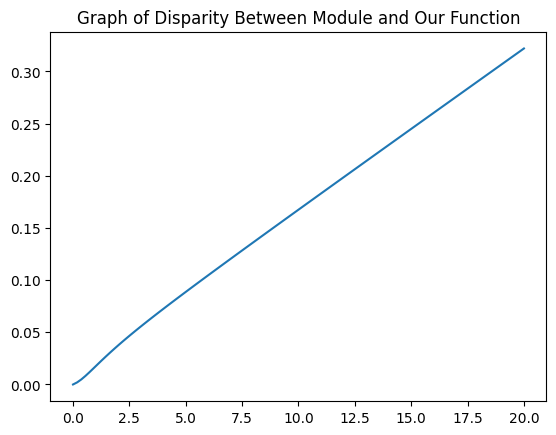

In [2]:
import Convolver as cnv 
import matplotlib.pyplot as plt
isn = np.linspace(0,20, 110)
asn = []
for i in isn:
    a = np.abs(mfp_astro(i, 35.84, 512) - cnv.mfp(i, cnv.H(i), 35.84, 512))/mfp_astro(i, 35.84, 512)*100
    asn.append(a)
plt.plot(isn,asn)
plt.title("Graph of Disparity Between Module and Our Function");

Though we have same comsological model, we have increasing error with redshift, hence there is some disagreement between our function and astropy module, find out.

# Trying the convolution module the smooth the halo catalogue

In [1]:
from Convolver import *

In [5]:
asto = convolver('Halo_maps_256/Halo_map_8.000',64, mfp(8.000, H(8.000, 70.1, 0.3183, 0.6817), 35.84, 64))

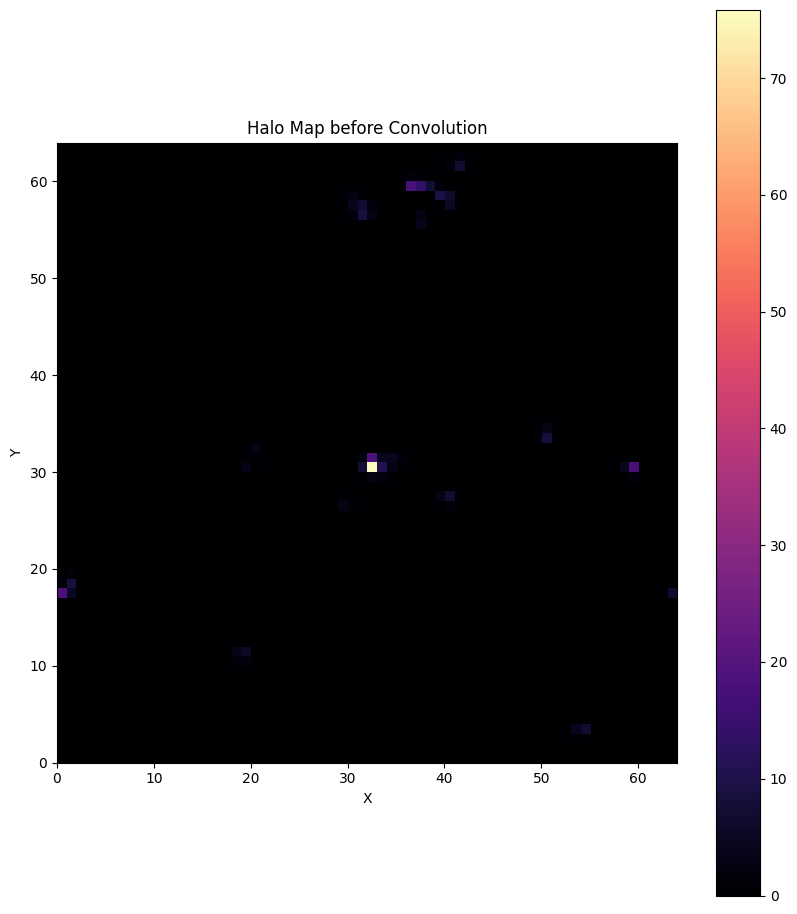

In [6]:
plotter(file_reader('Halo_maps_256/Halo_map_8.000'), "Halo Map before Convolution")

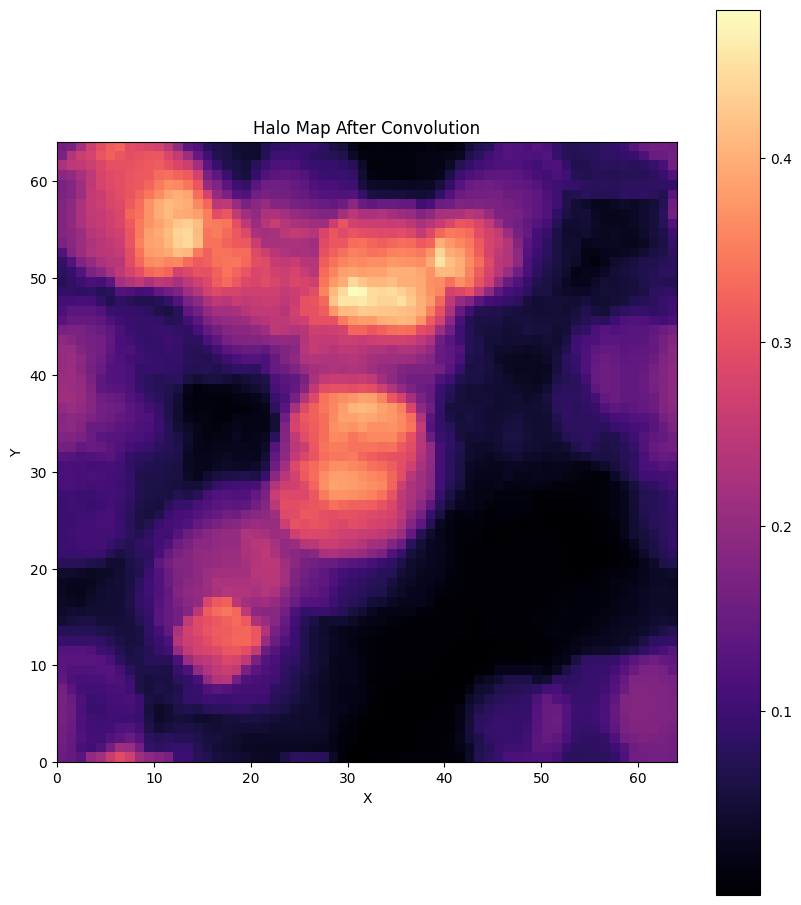

In [7]:
plotter(asto, "Halo Map After Convolution")

the results match with the functions we had earlier for the convolution and the n body assignment, things are good to go with so far

# Trying the same thing with other redshifts and resolution and comparing the smooothed halo catalogue with the ionized fields (with redshift space distortion)

In [1]:
redshifts = [11.405,10.582,9.826,9.137,8.515,7.960,7.480,7.059]
from Convolver import *

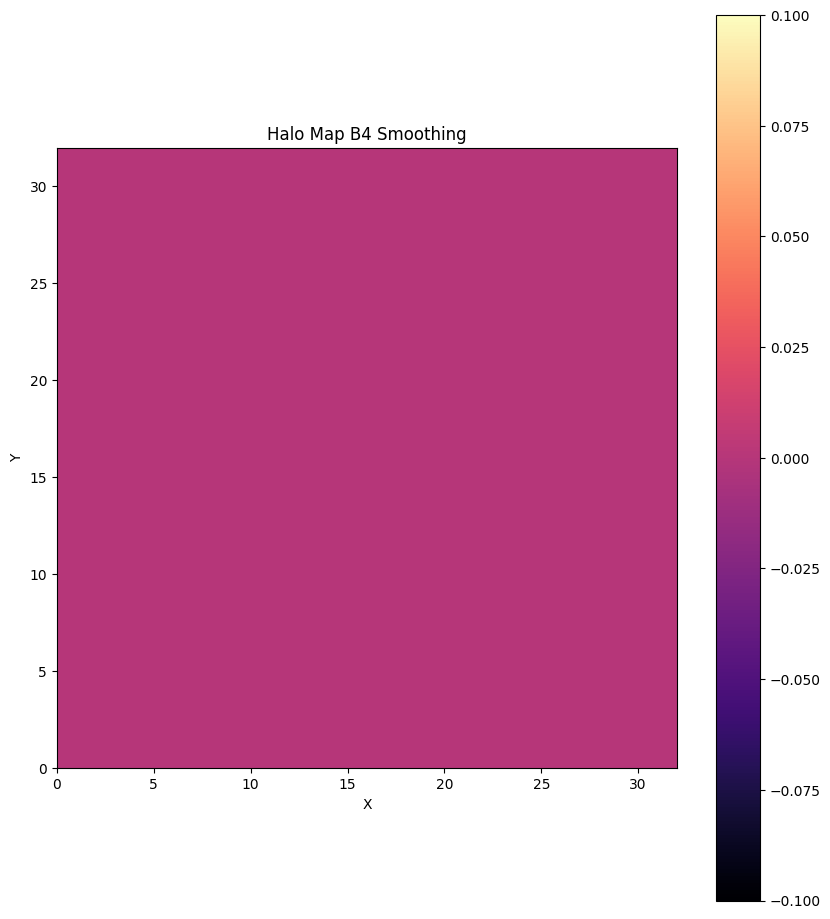

In [13]:
plotter(file_reader('Maps_128_28/Halo_map_7.059'), "Halo Map B4 Smoothing")
asto = convolver('Maps_128_28/Halo_map_7.059',32, mfp(7.059, H(7.059, 70.1, 0.3183, 0.6817), 35.84, 64))

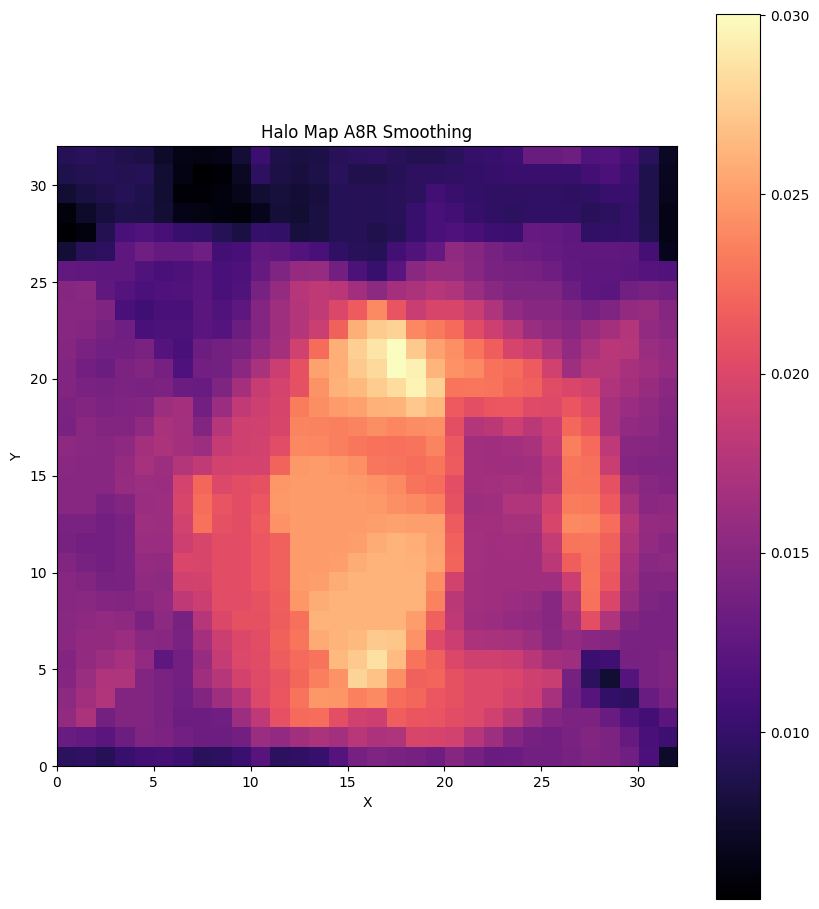

In [12]:
plotter(asto, "Halo Map A8R Smoothing")

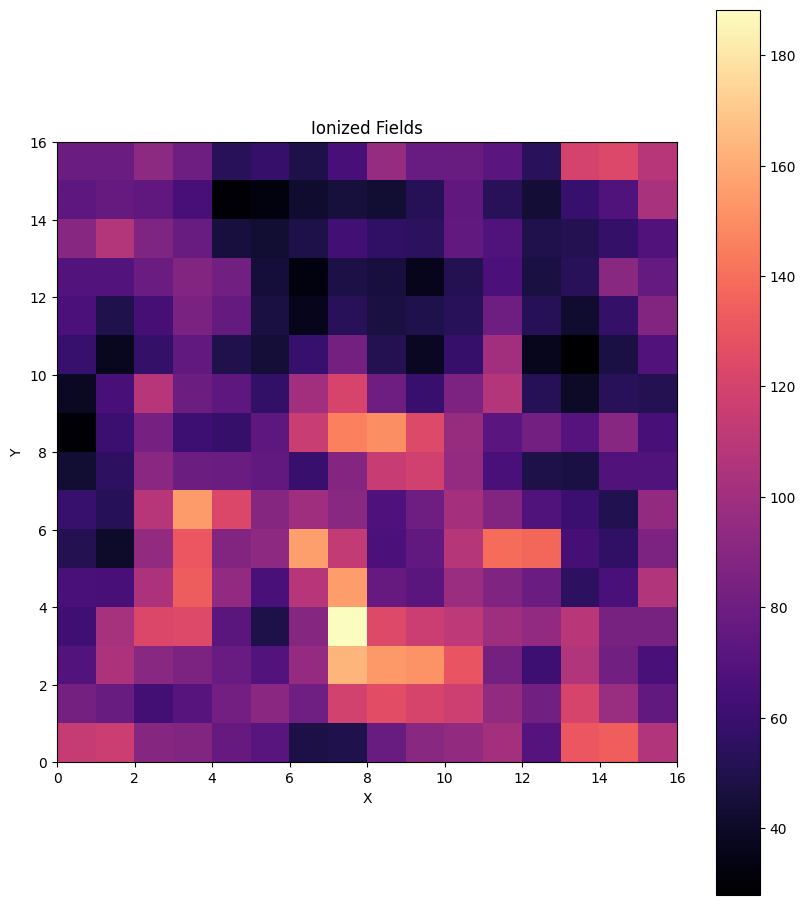

In [14]:
basto =  fld_rdr('Maps_128_28/HI_maprs_7.059')
plotter(basto, "Ionized Fields", 4)

### Doing it for all redshifts

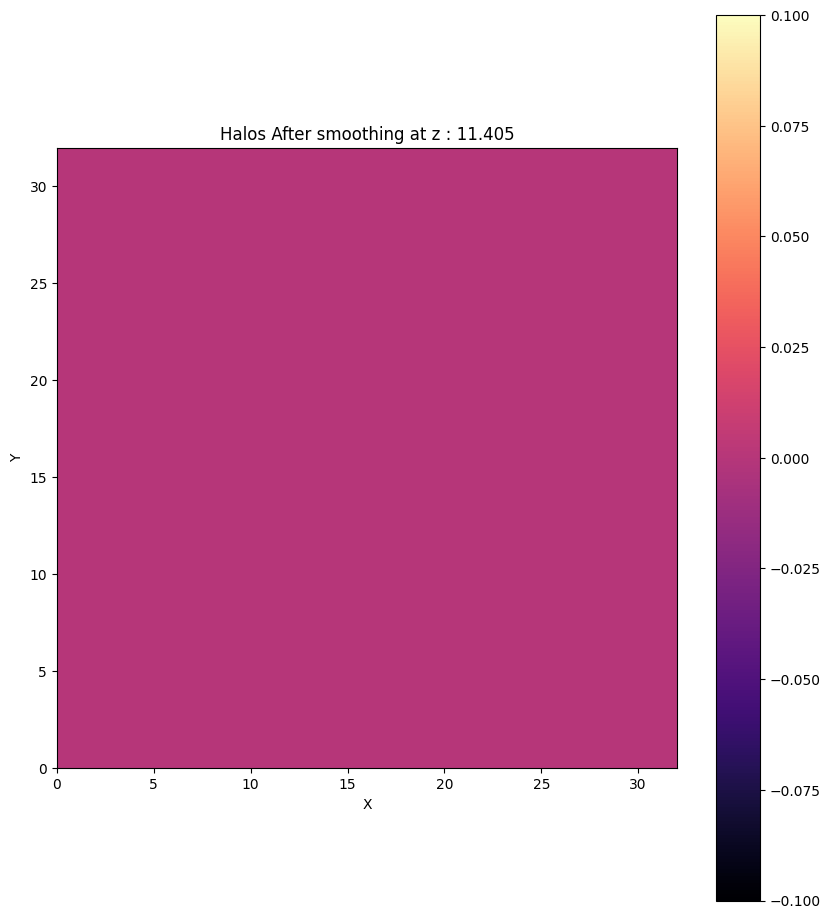

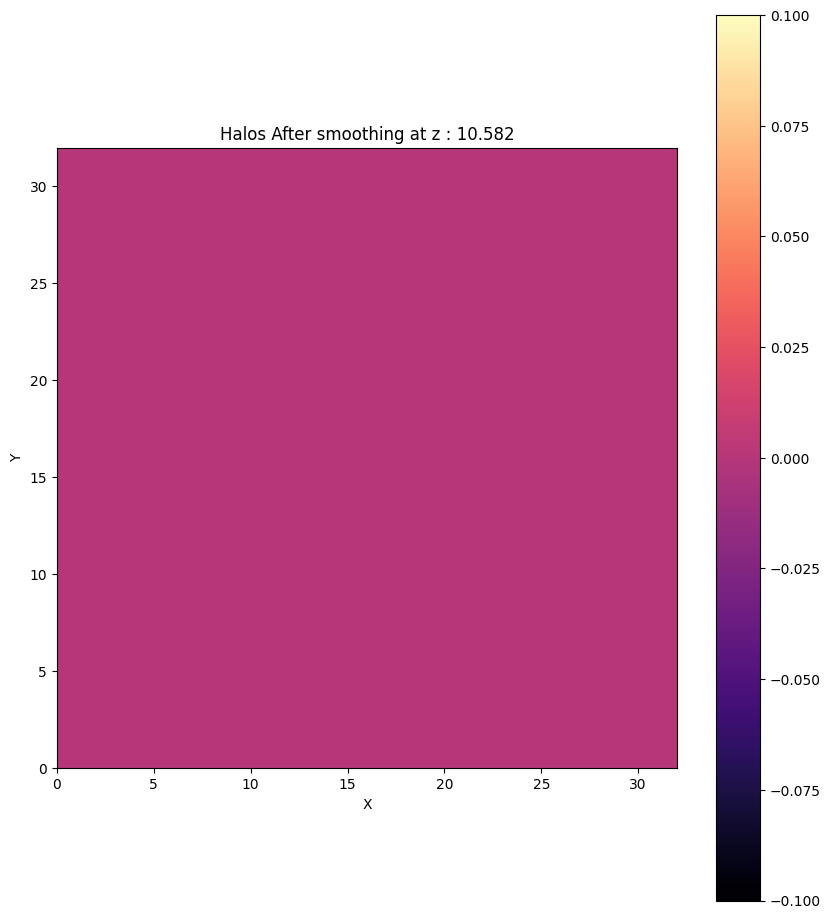

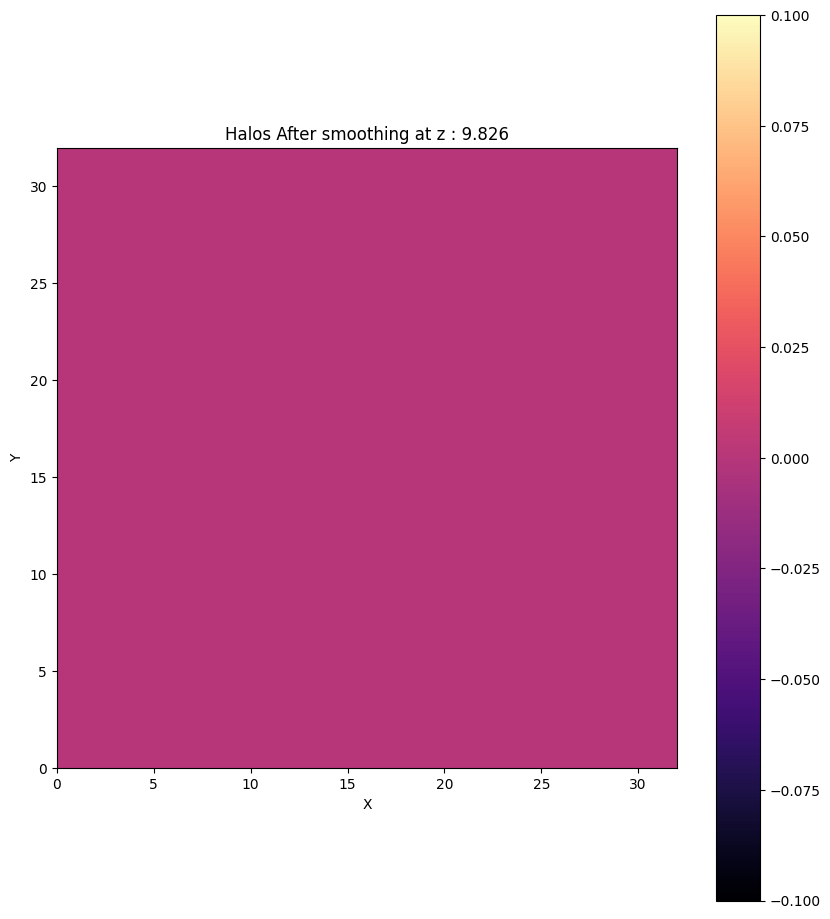

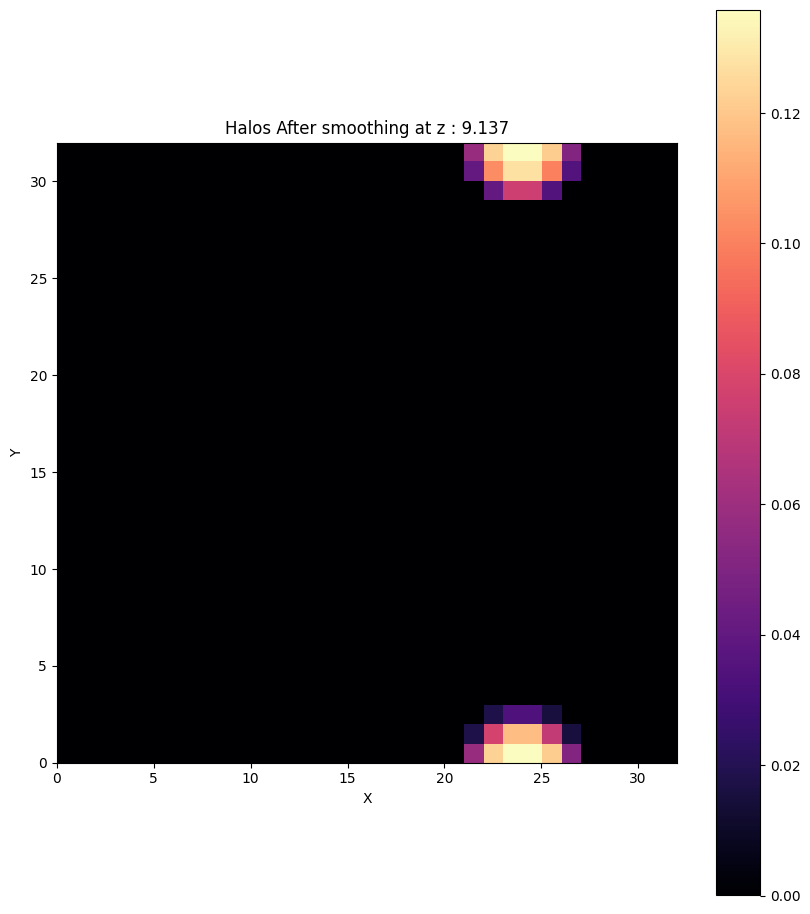

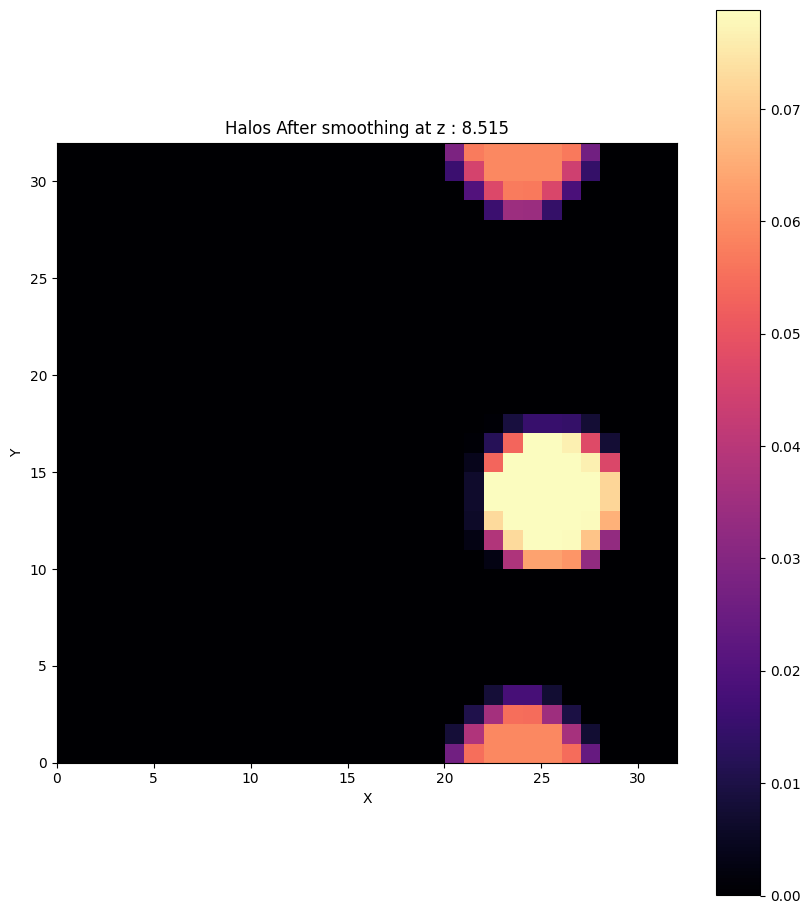

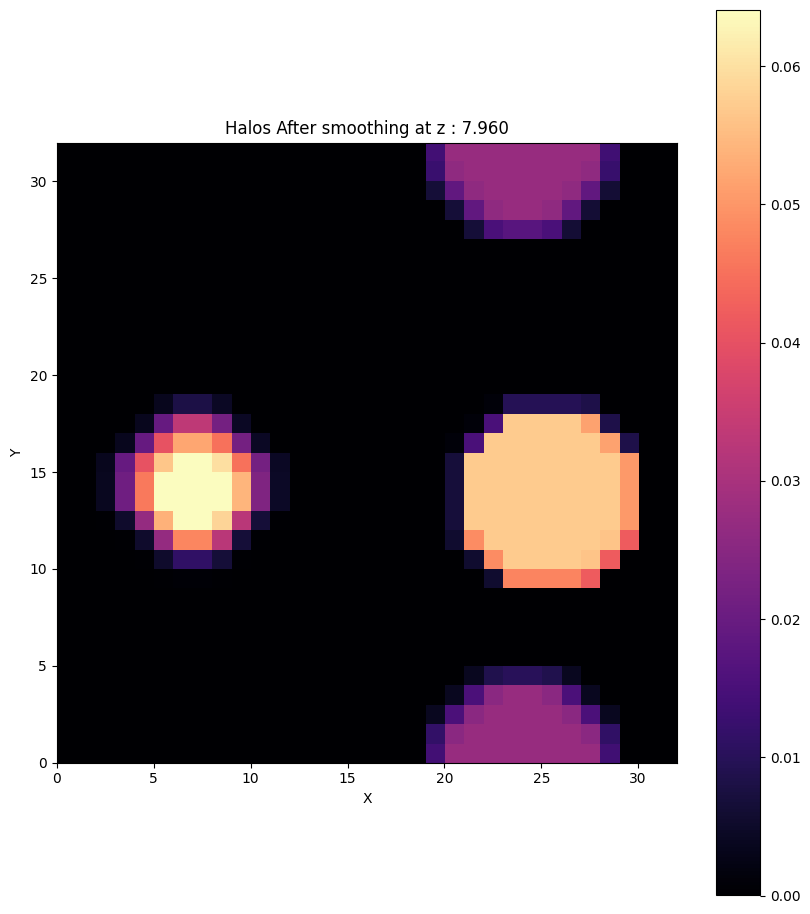

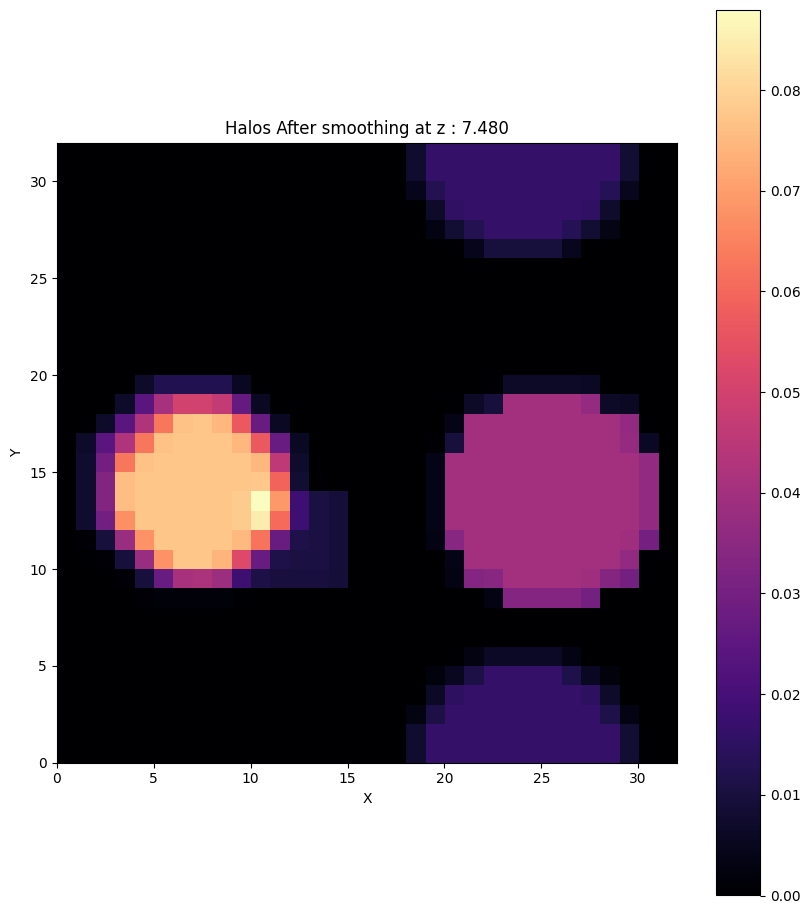

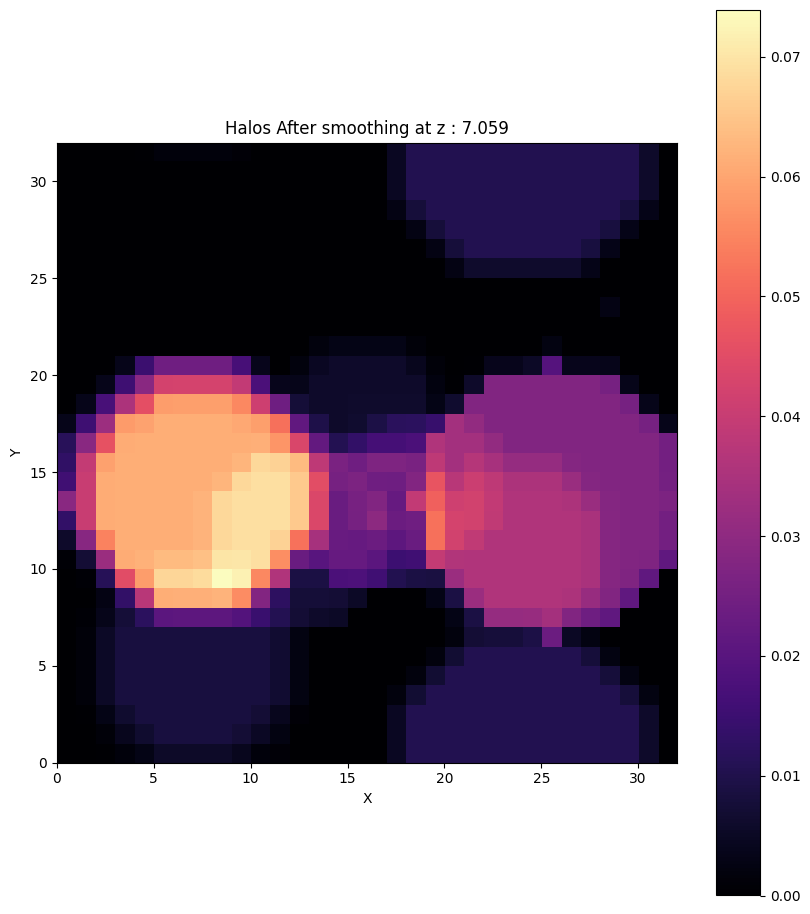

In [30]:
for zs in redshifts:
    arr = convolver(f'Maps_128_28/Halo_map_{zs:.3f}',32, mfp(zs, H(zs, 70.1, 0.3183, 0.6817), 35.84, 32))
    plotter(arr, f"Halos After smoothing at z : {zs:.3f}")

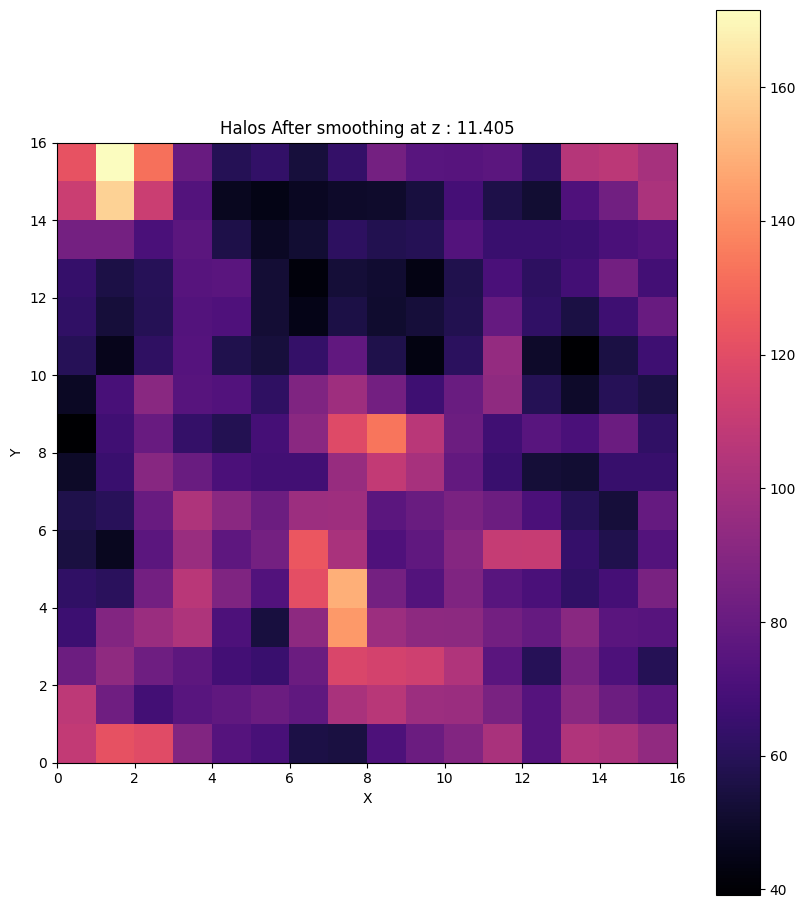

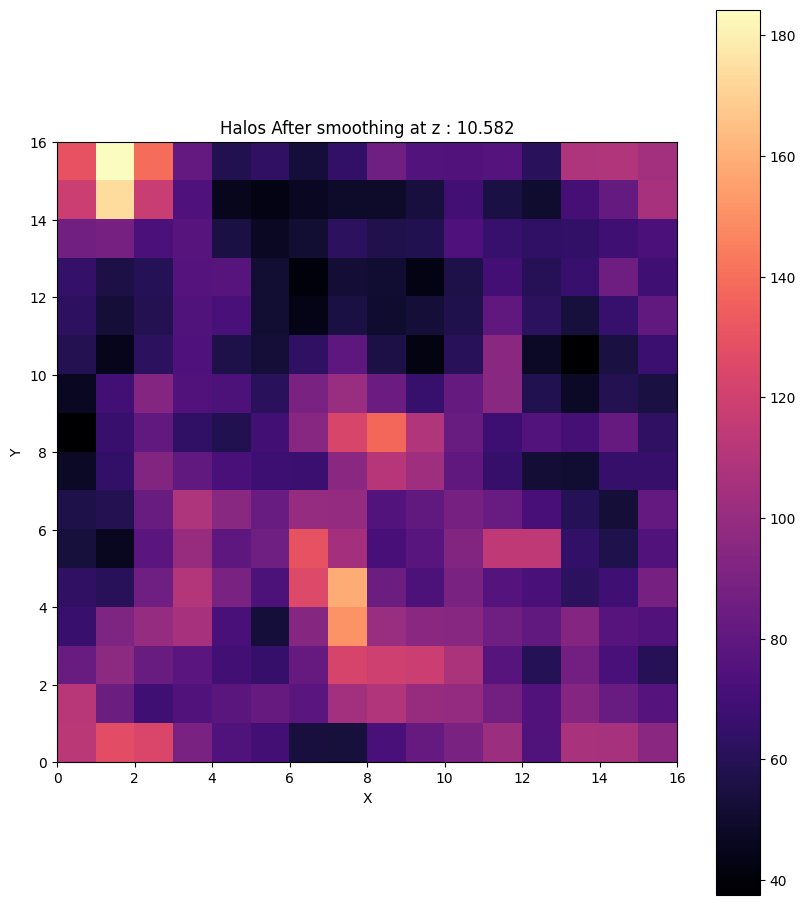

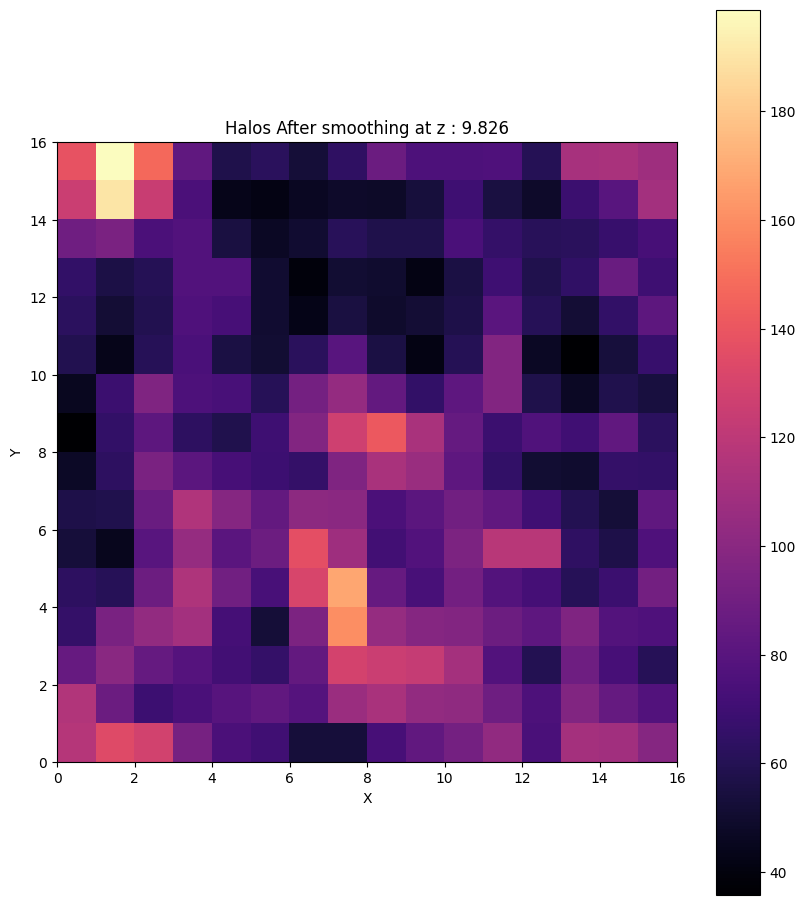

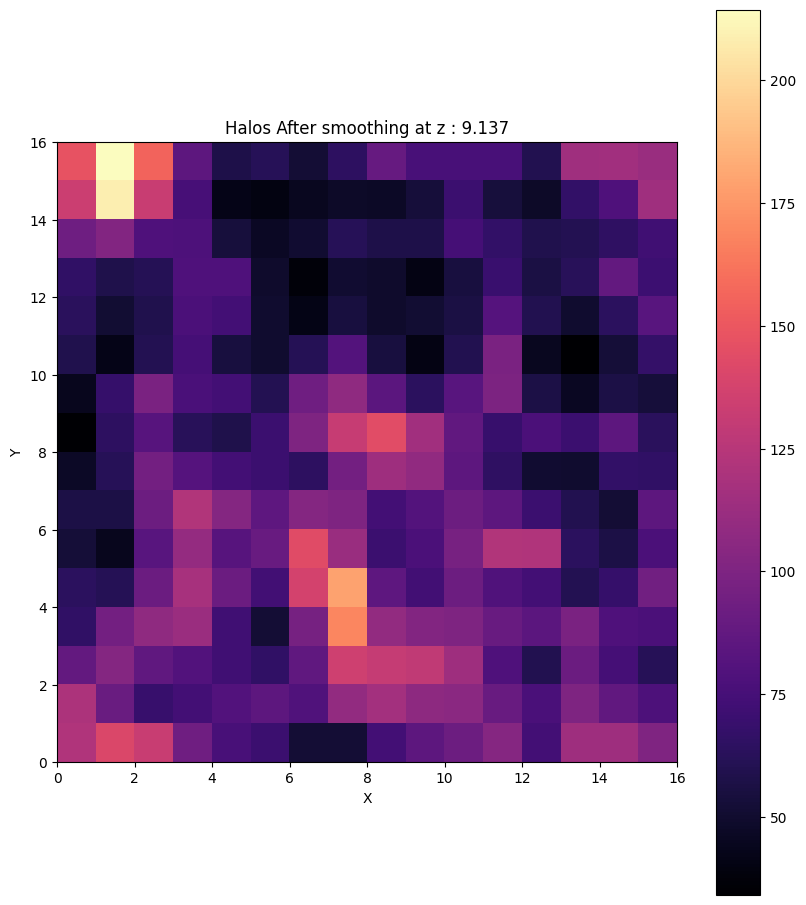

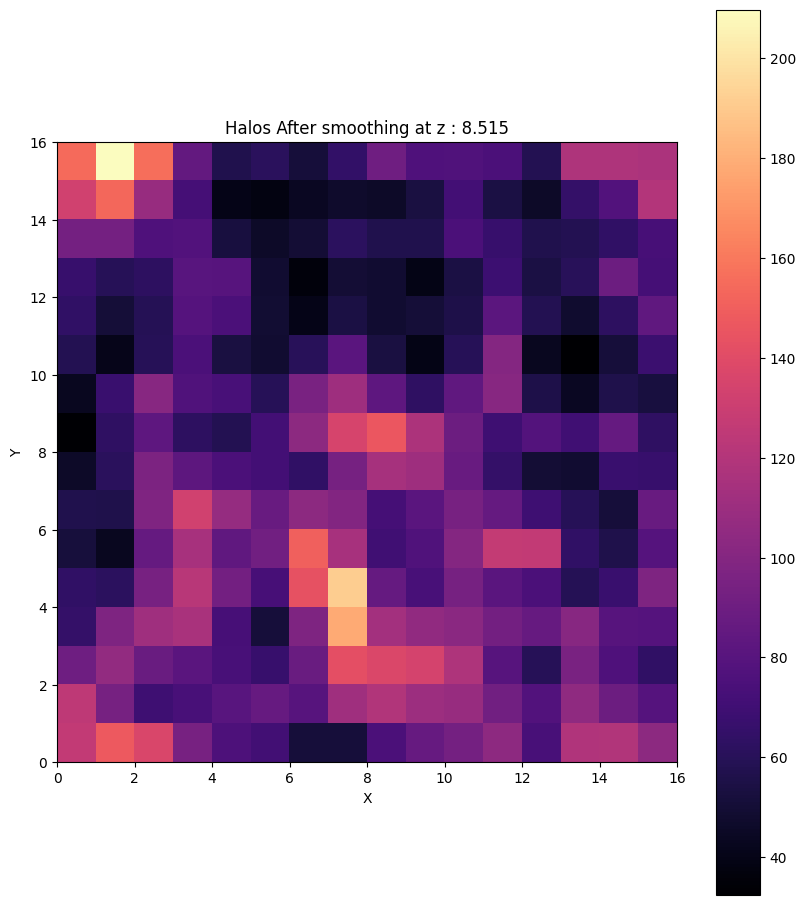

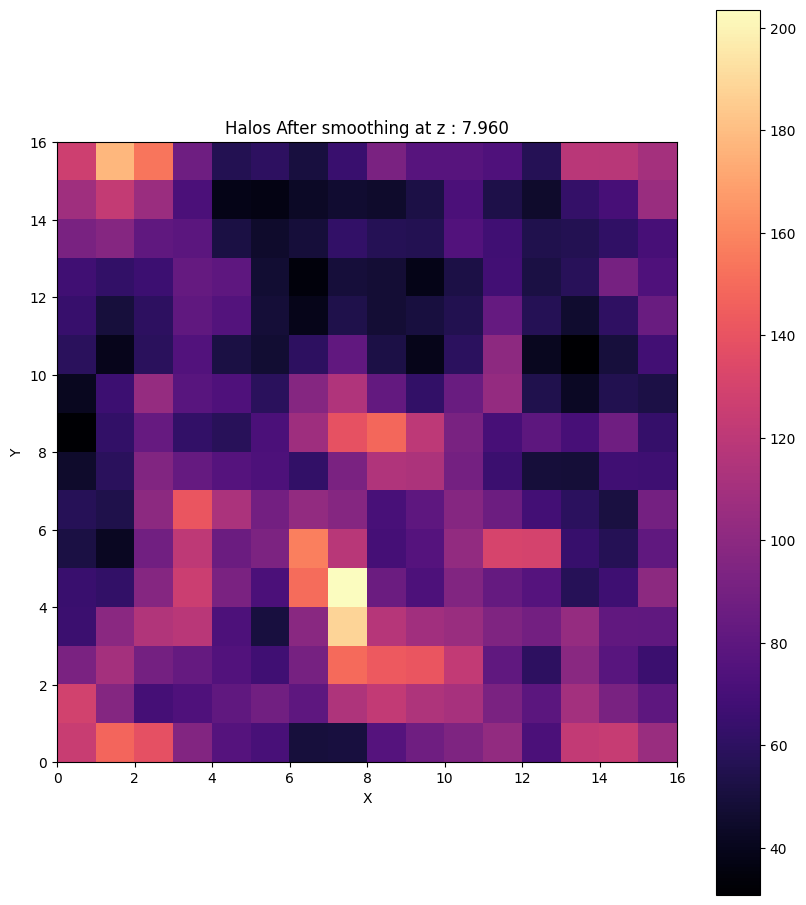

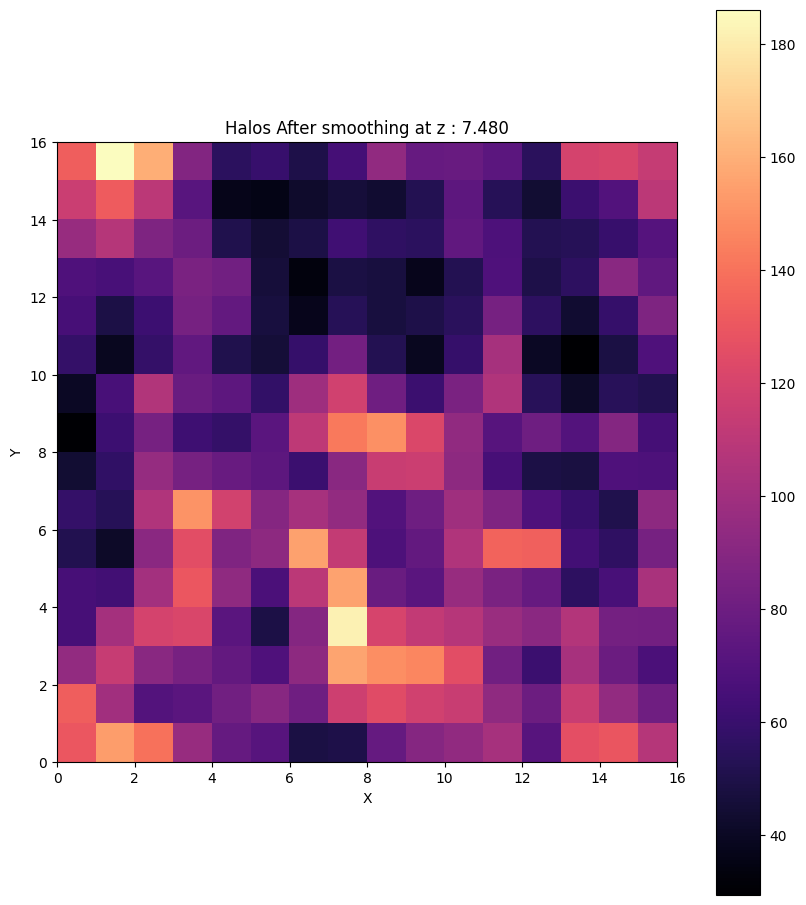

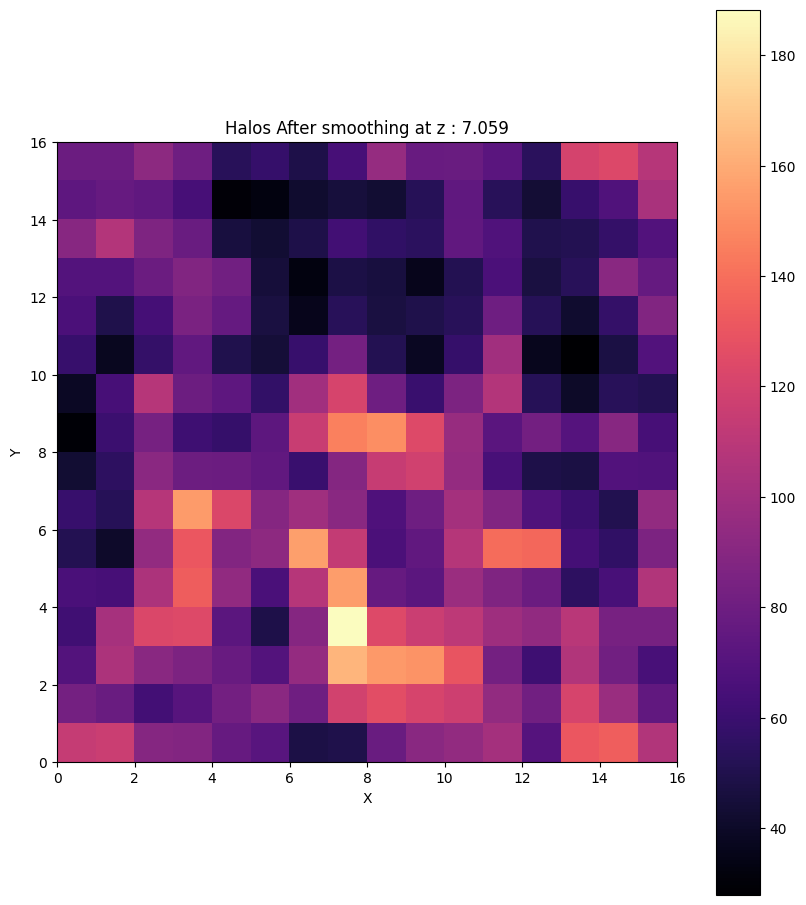

In [26]:
for zs in redshifts:
    plotter(fld_rdr(f'Maps_128_28/HI_maprs_{zs:.3f}'), f"Halos After smoothing at z : {zs:.3f}", 4)

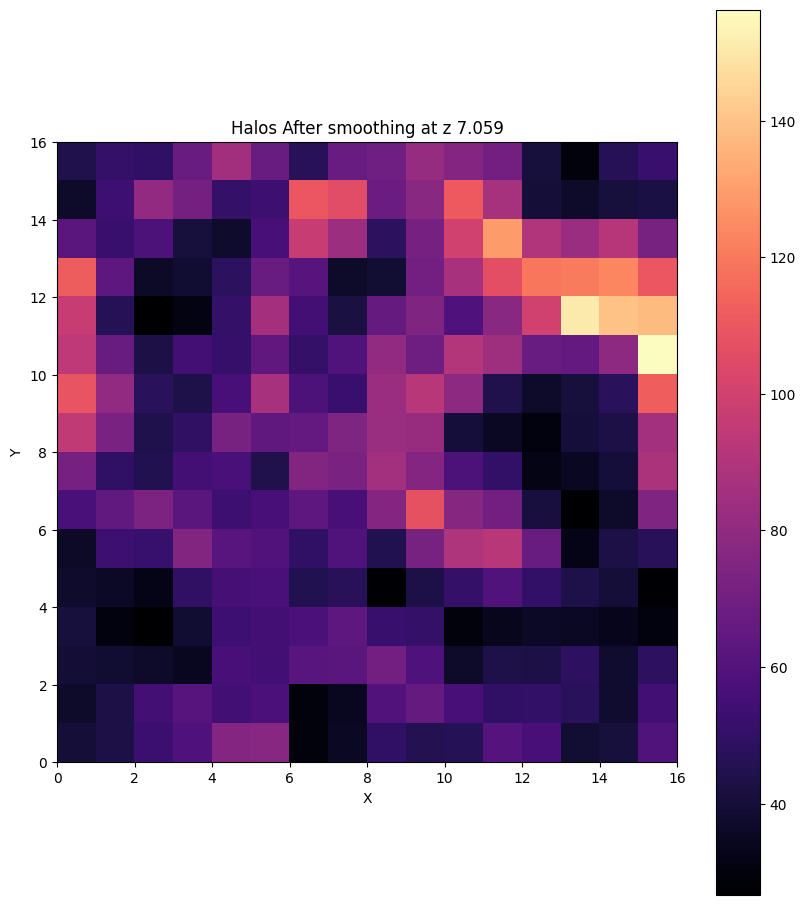

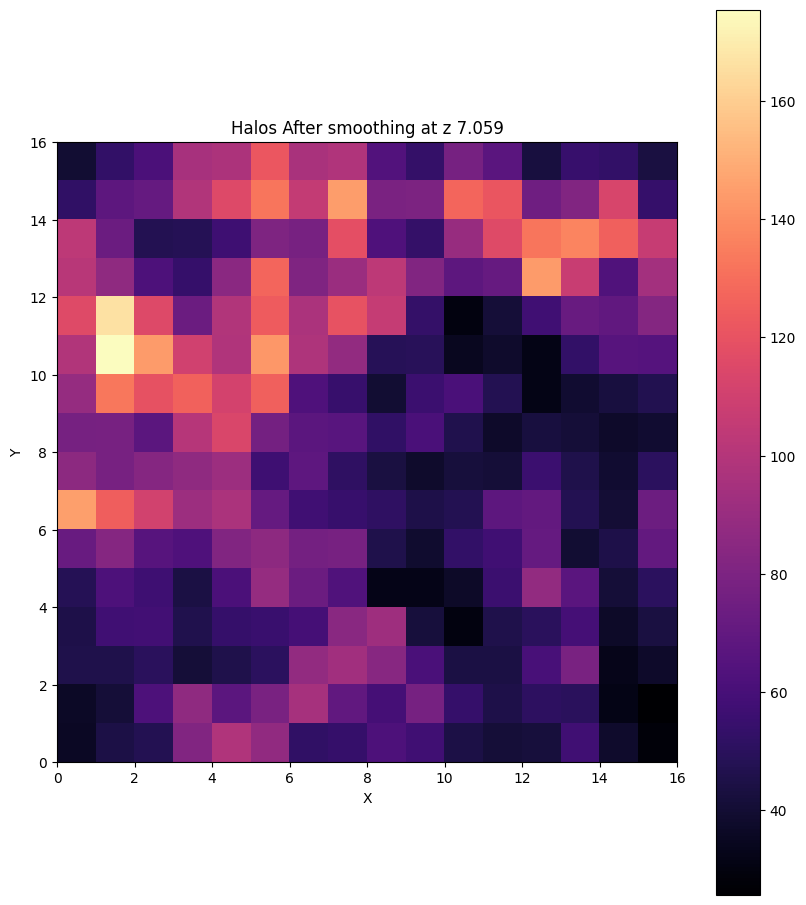

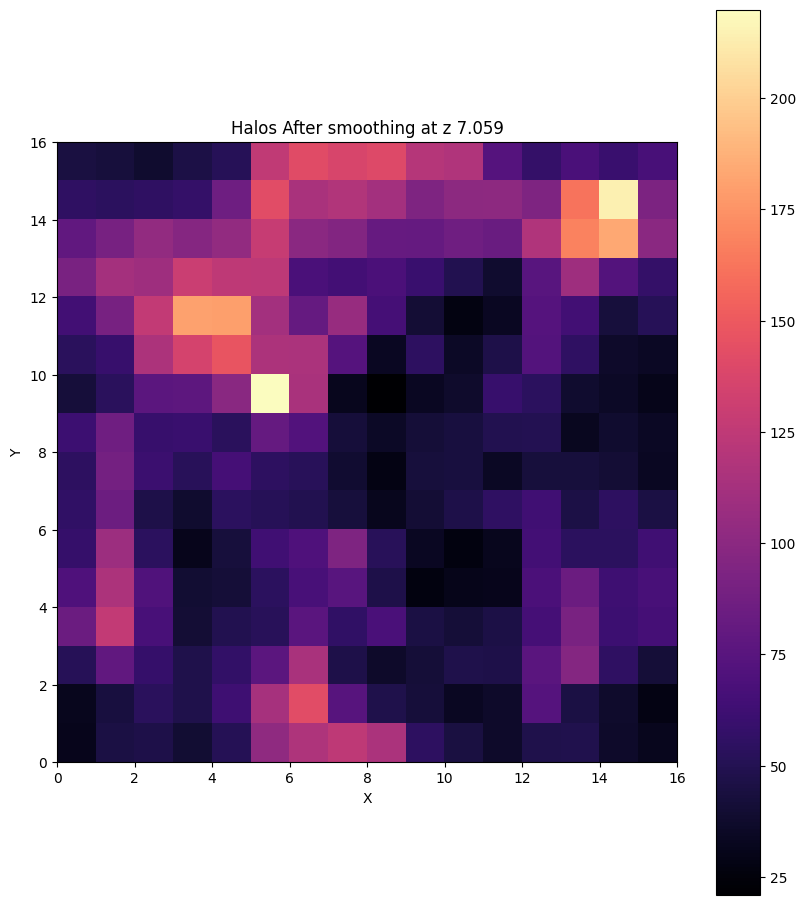

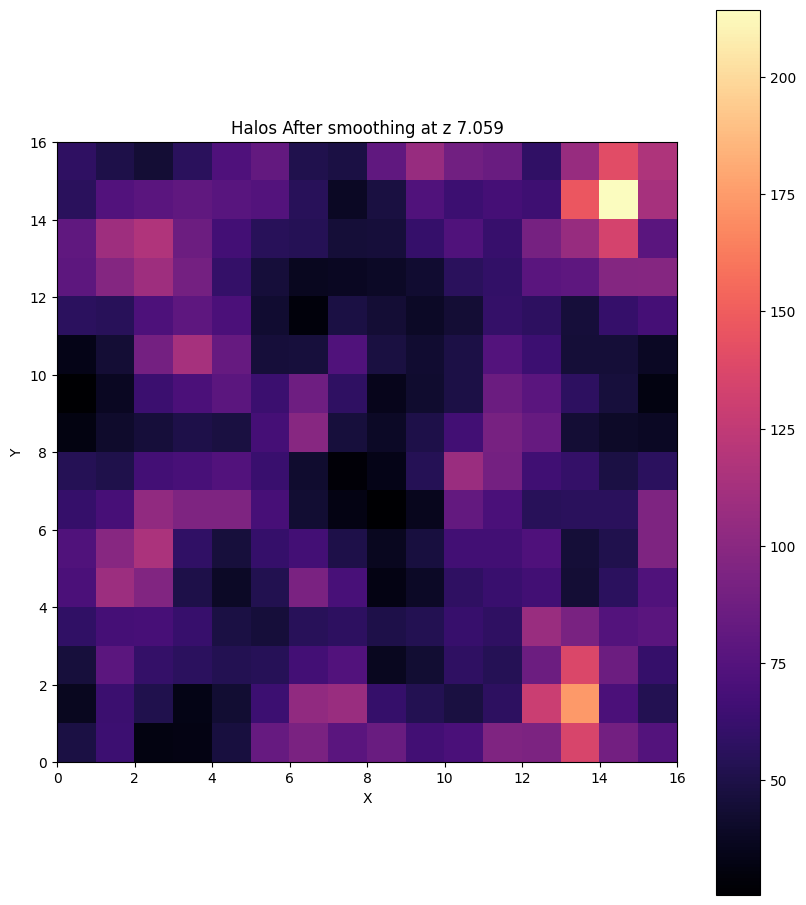

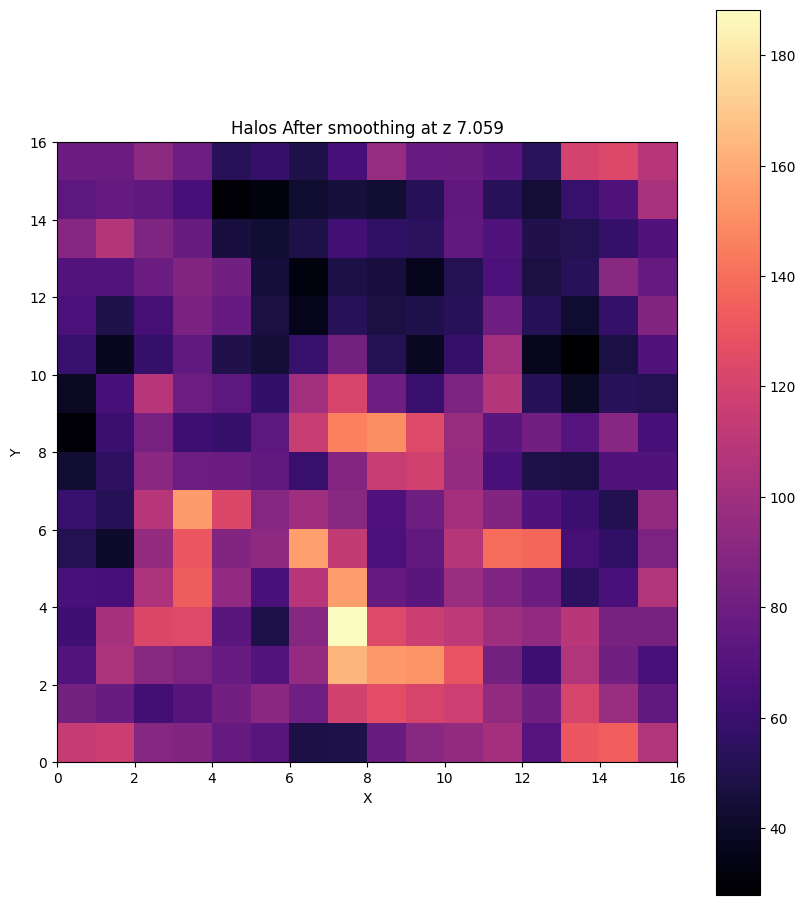

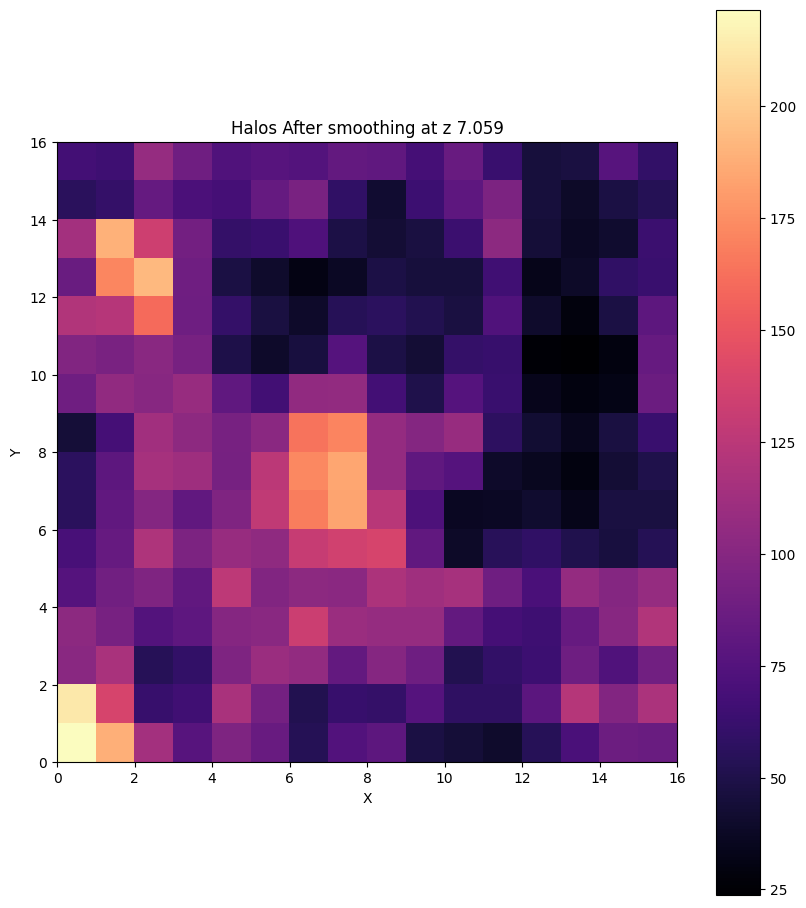

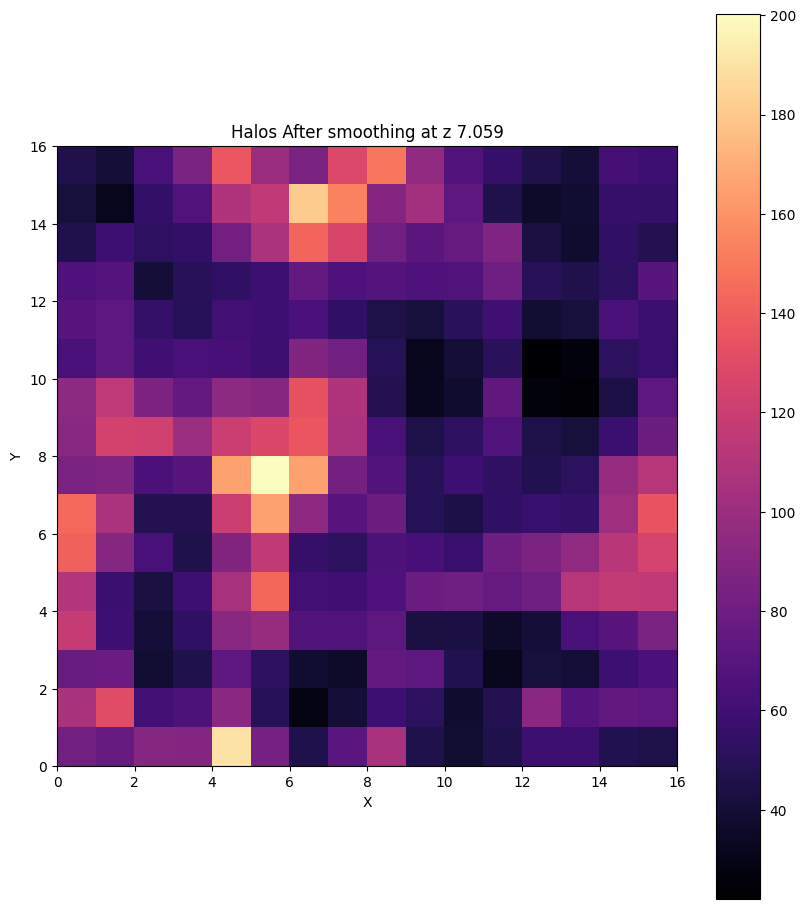

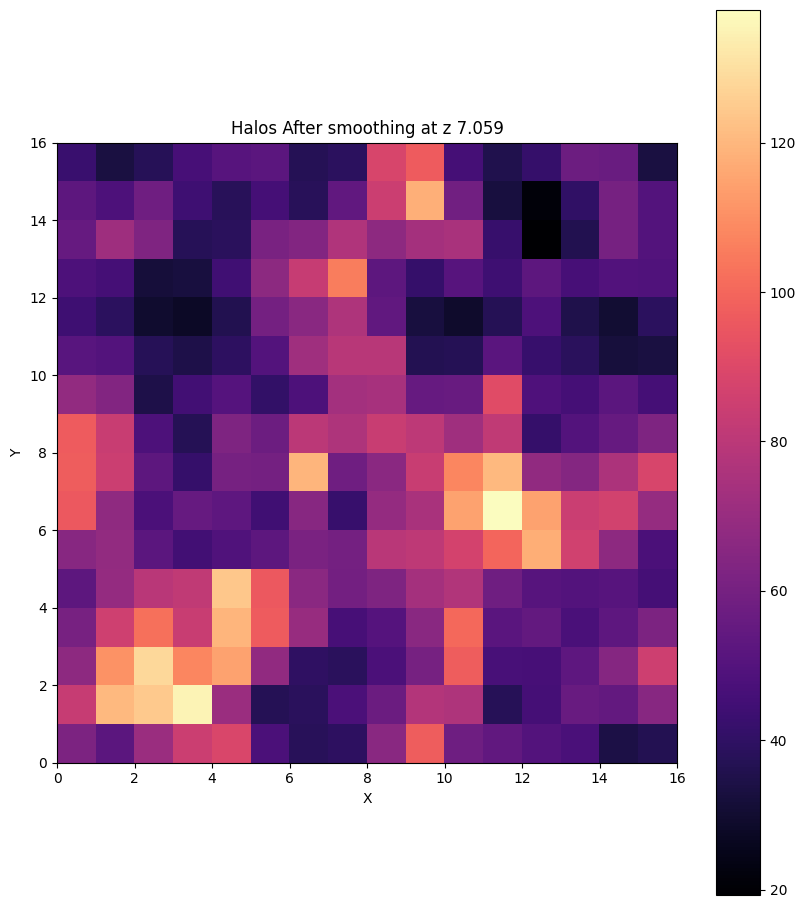

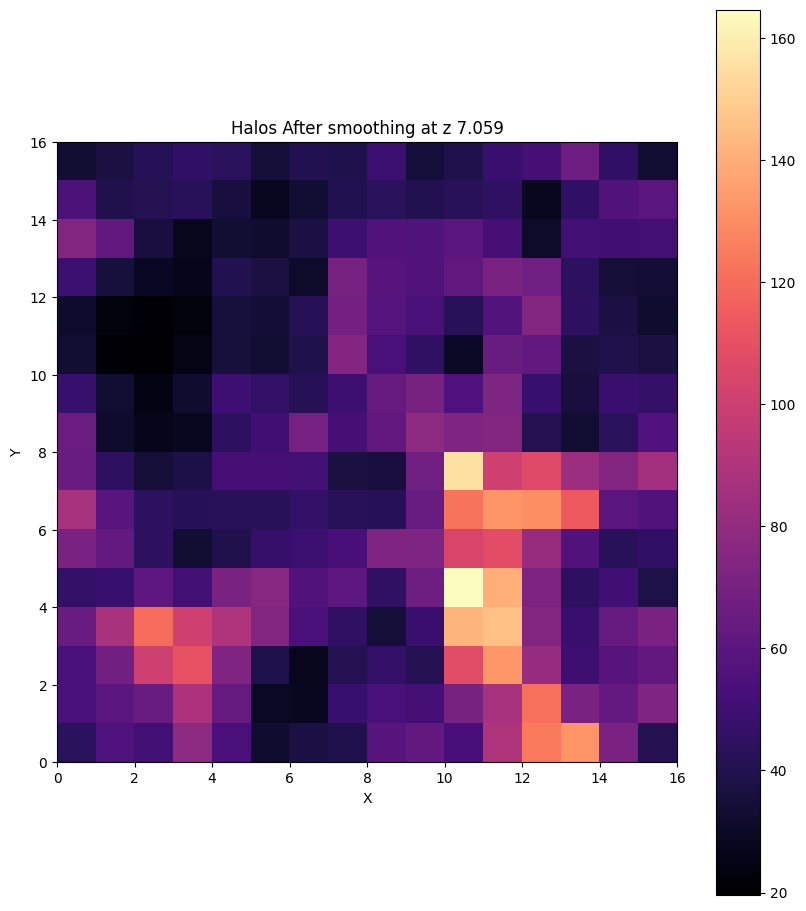

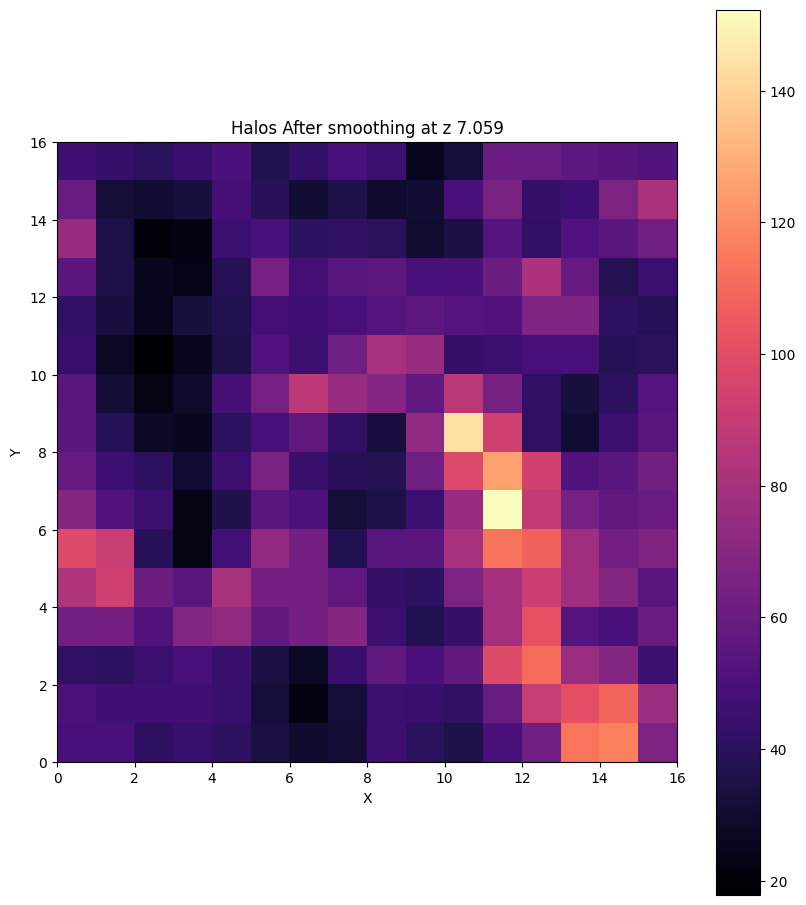

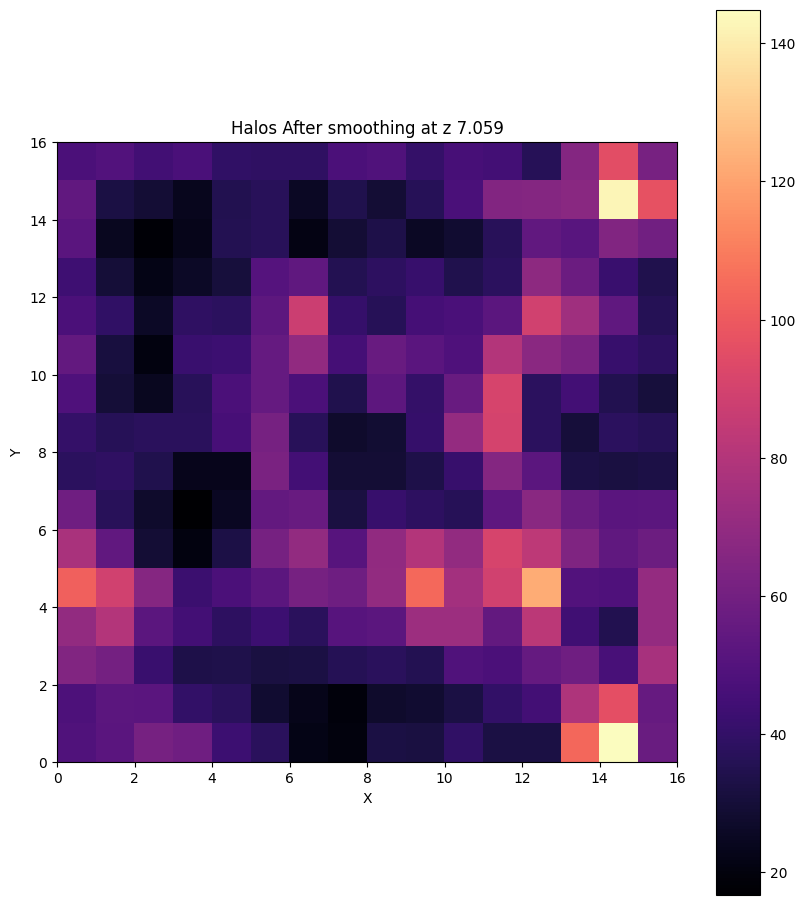

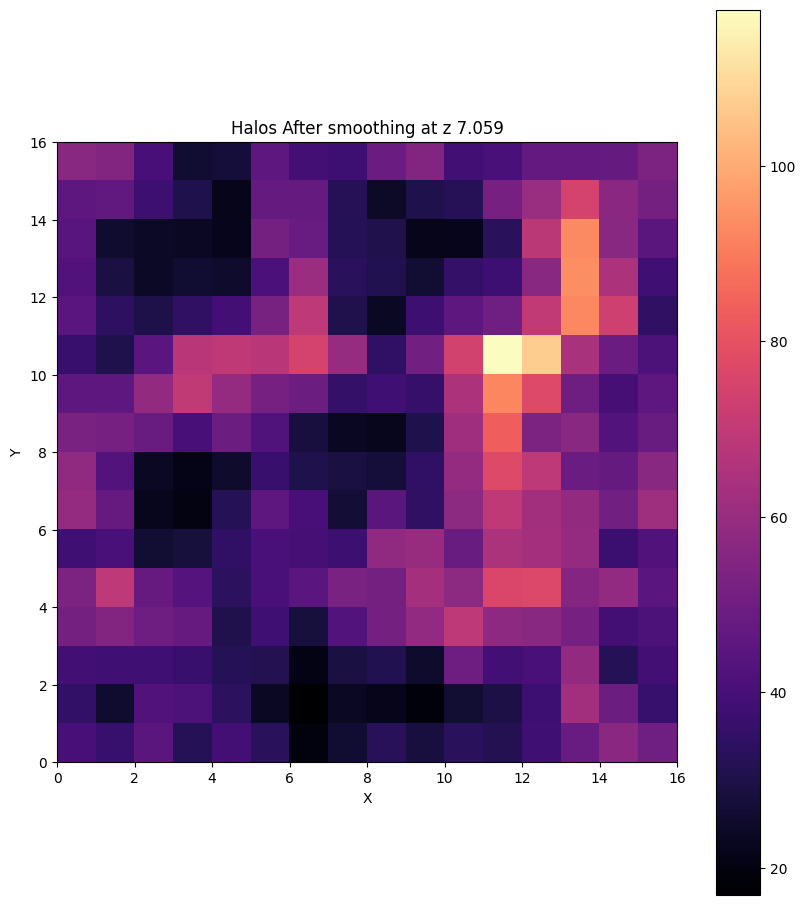

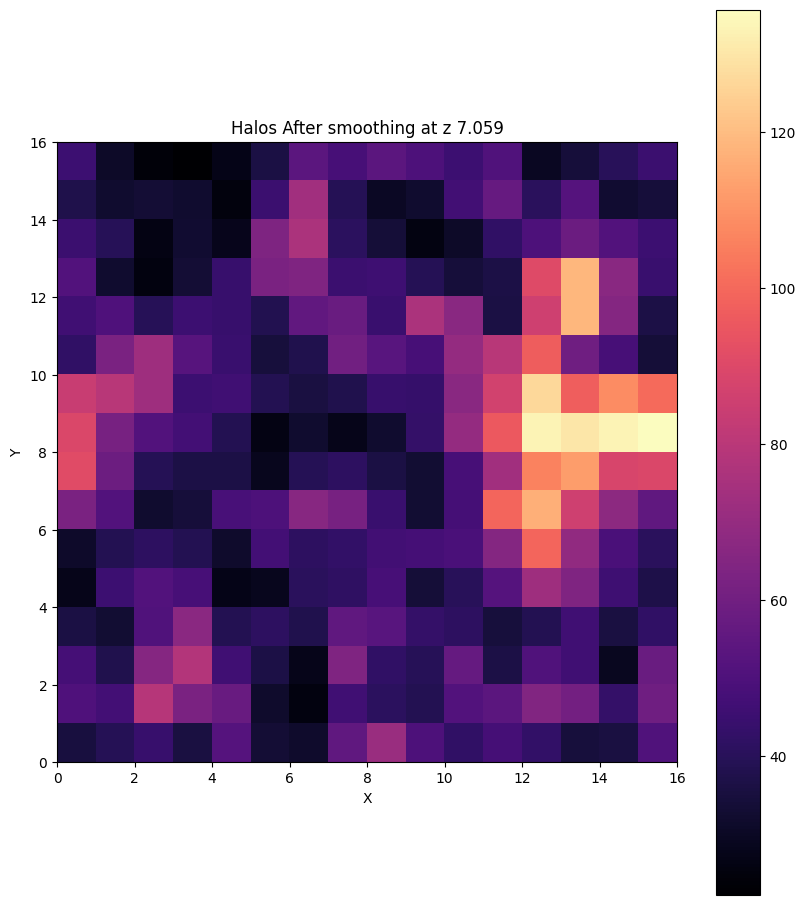

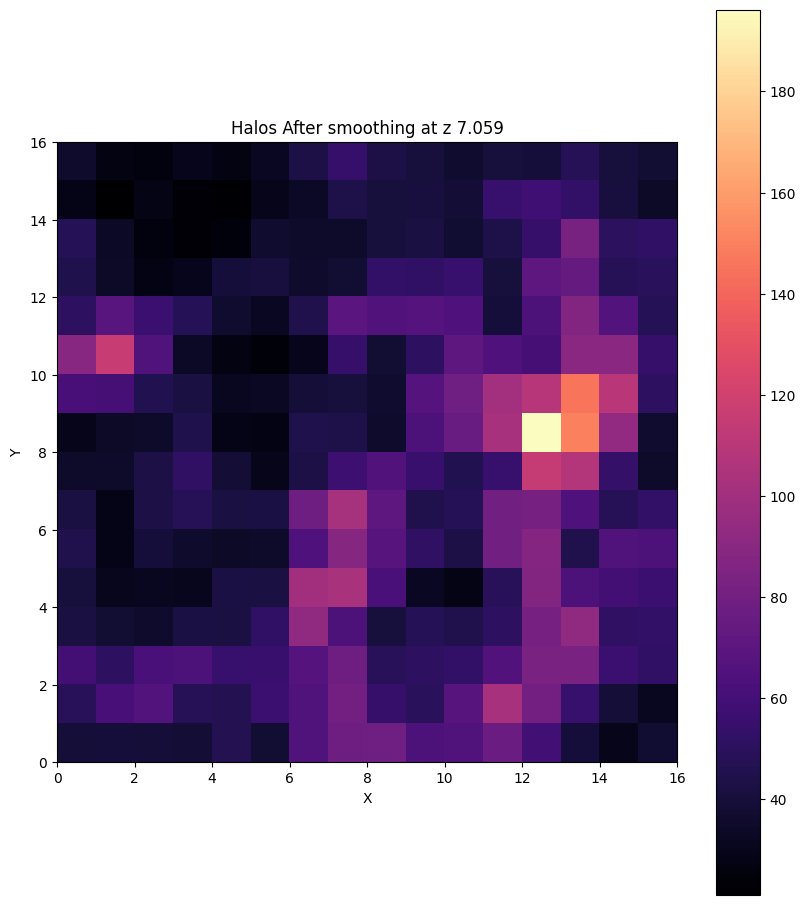

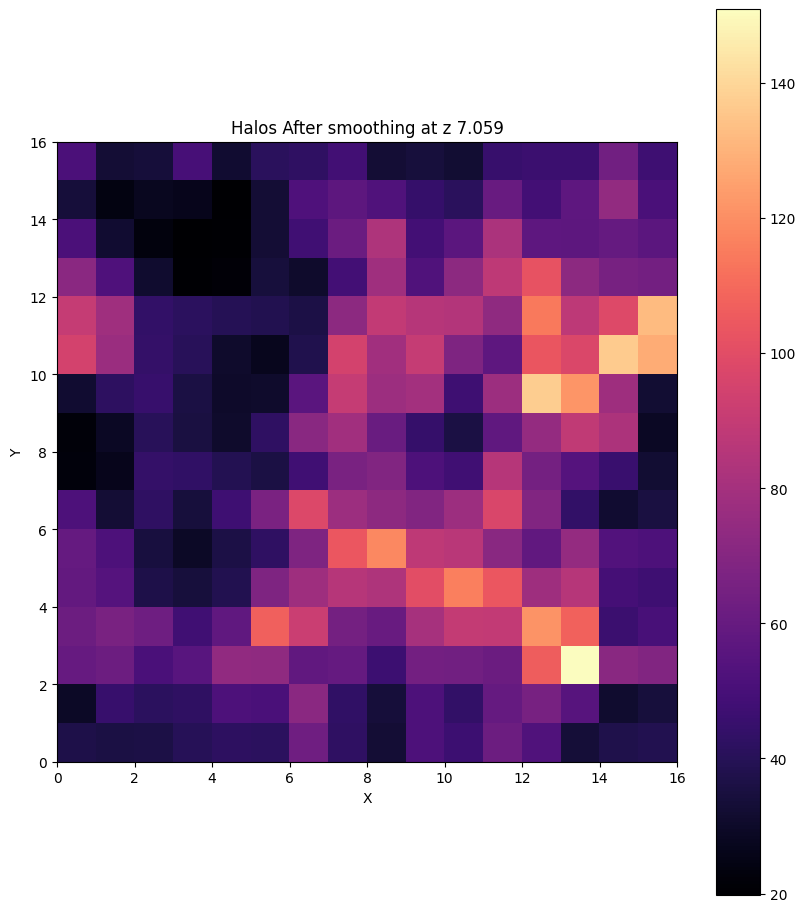

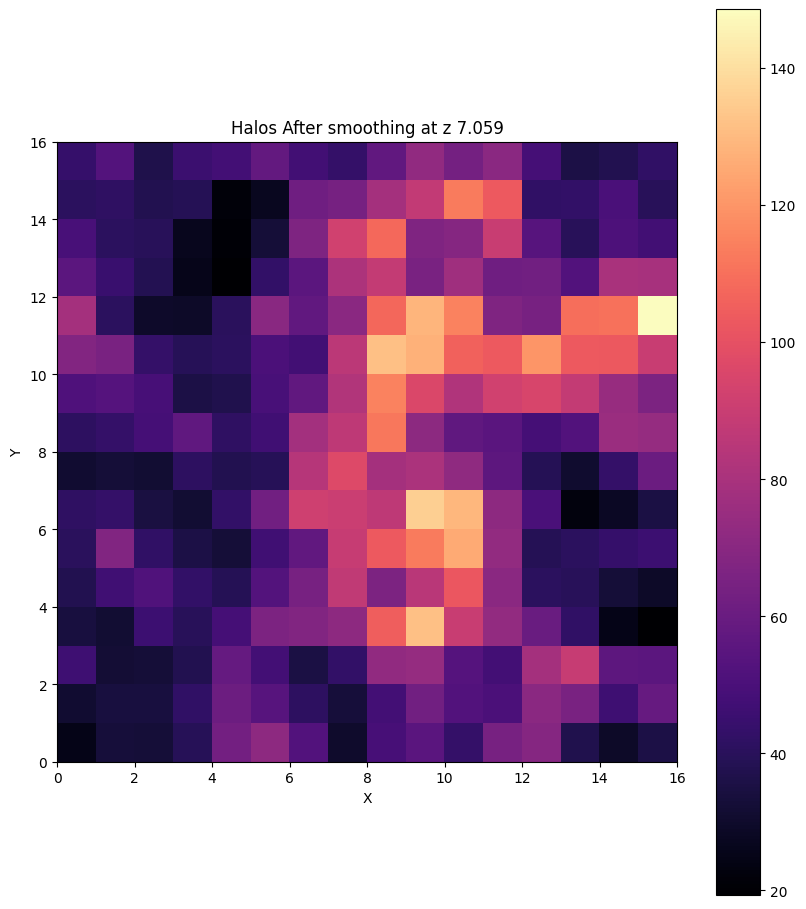

In [32]:
for i in range(0,16):
    plotter(fld_rdr('Maps_128_28/HI_maprs_7.059'), "Halos After smoothing at z 7.059", i)

### 256 grid, 0.14 grdi spacing

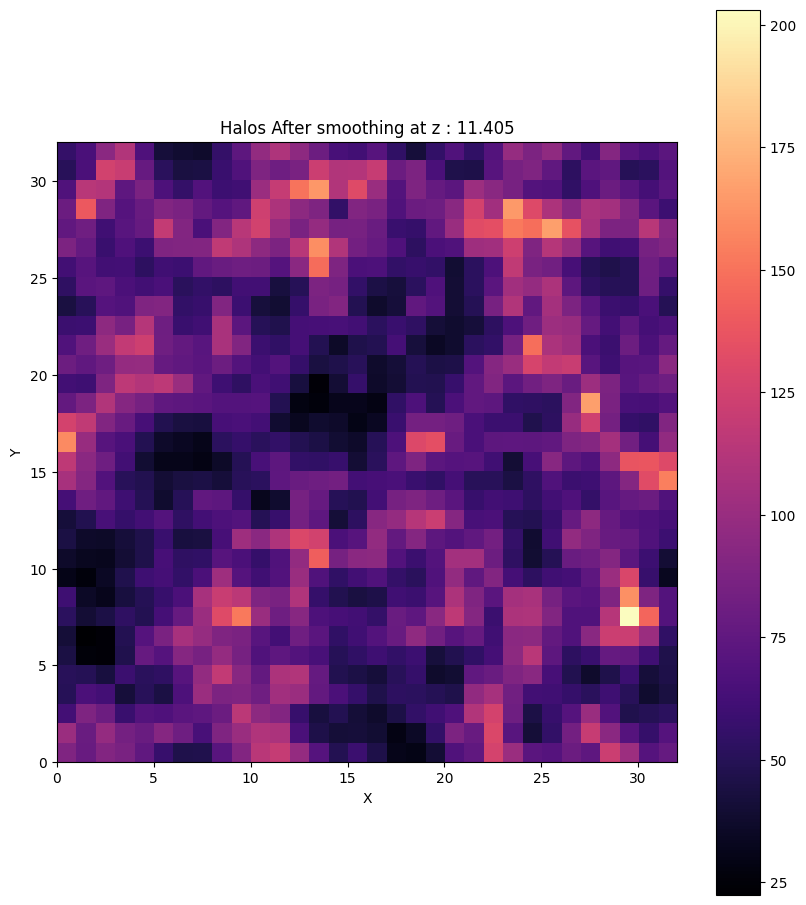

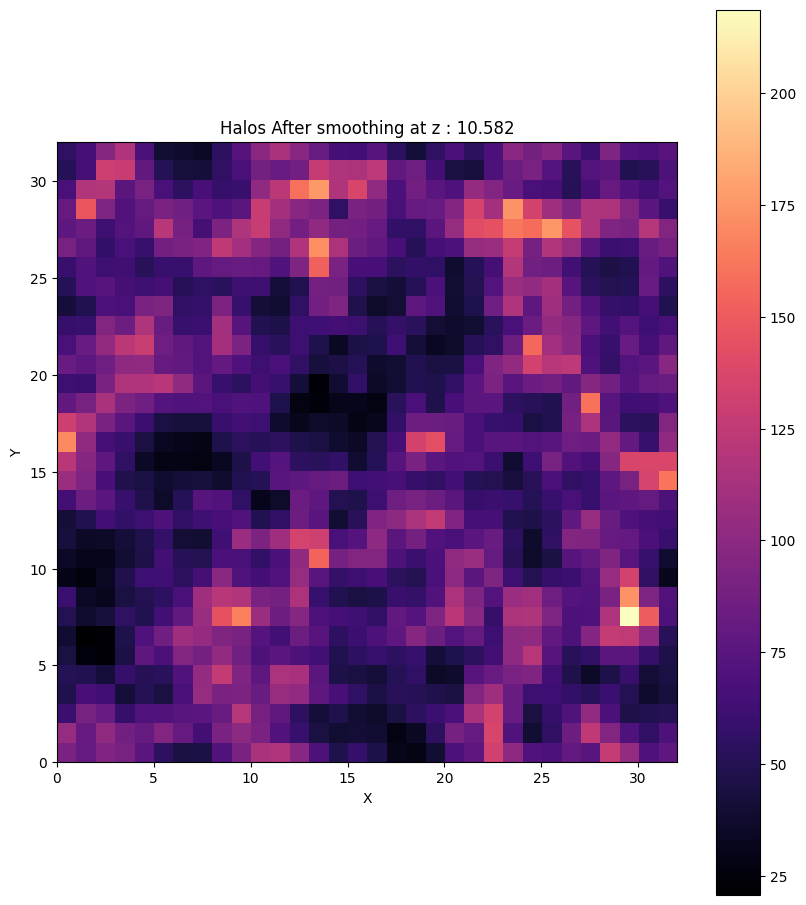

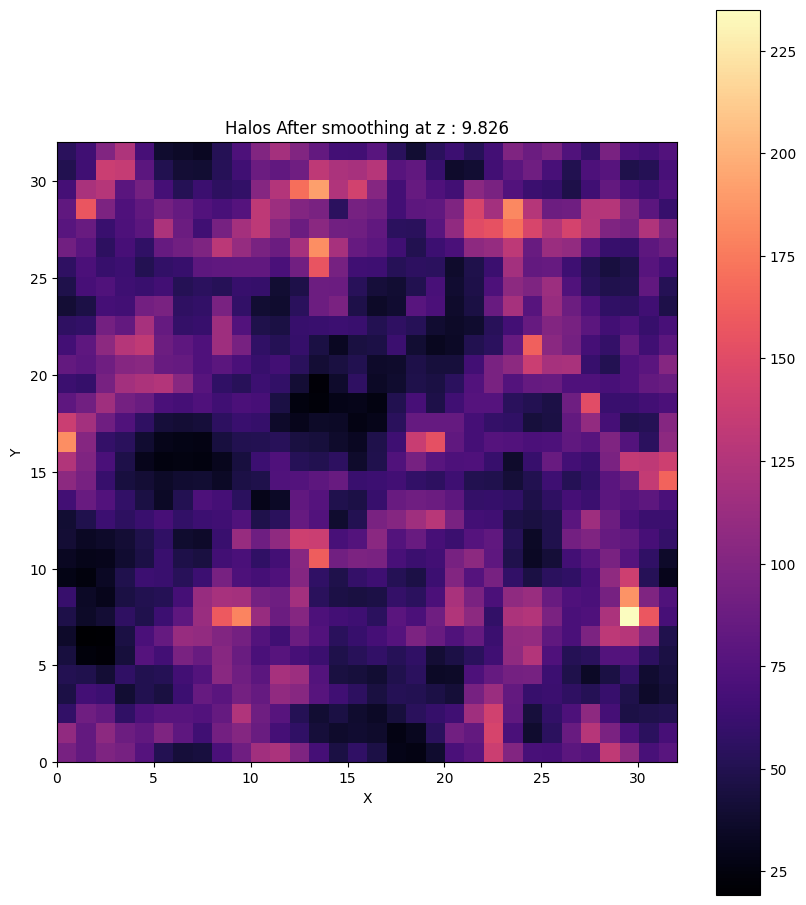

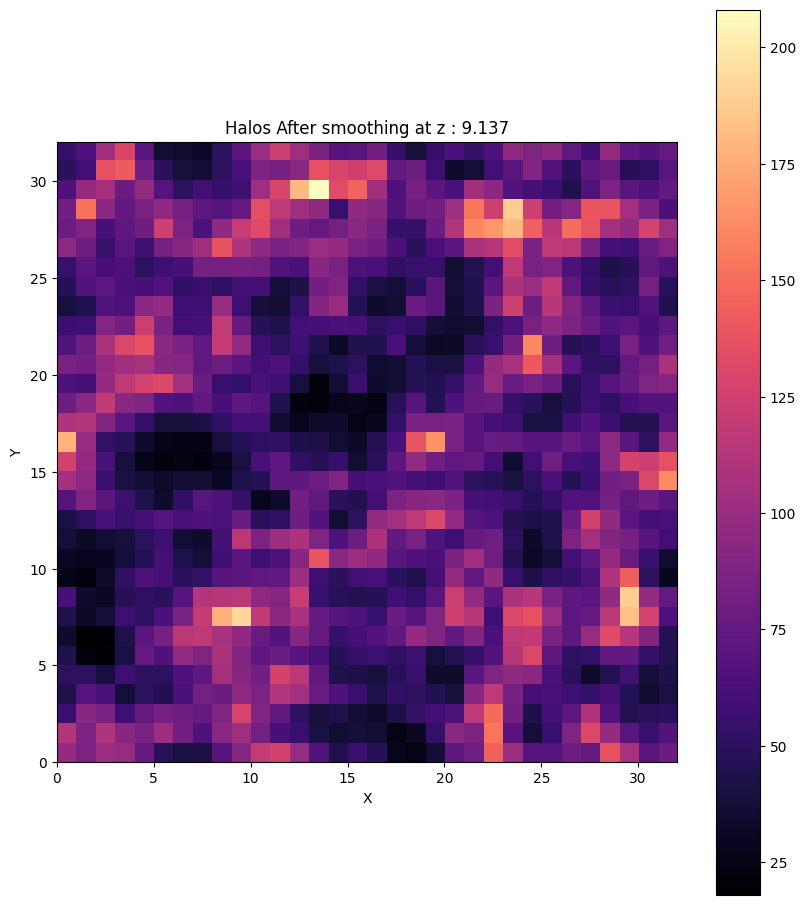

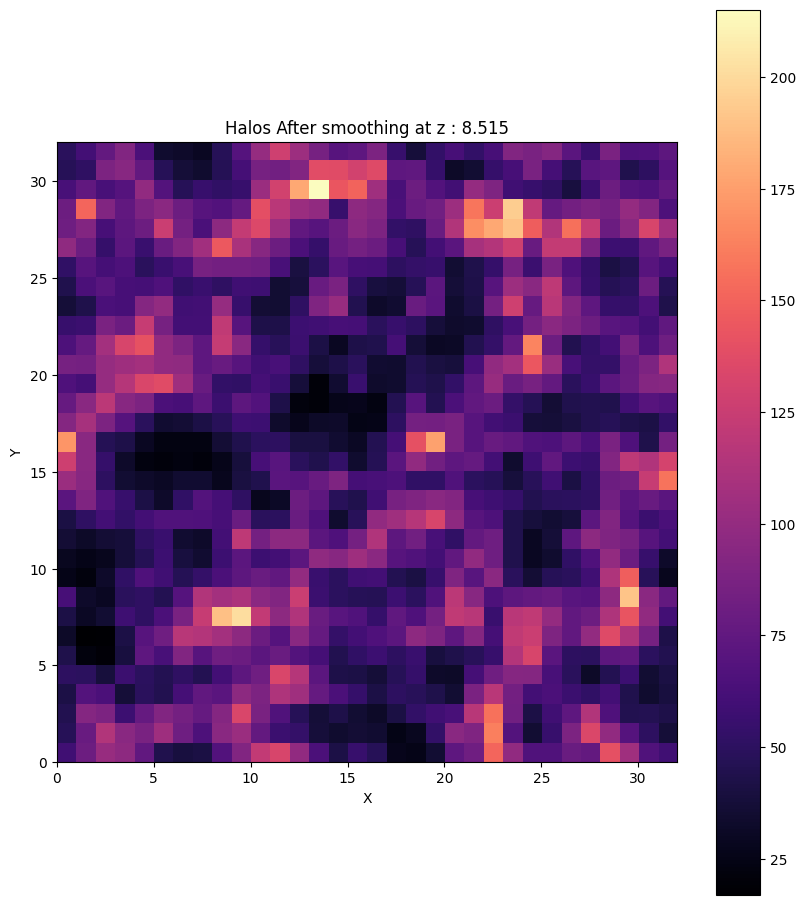

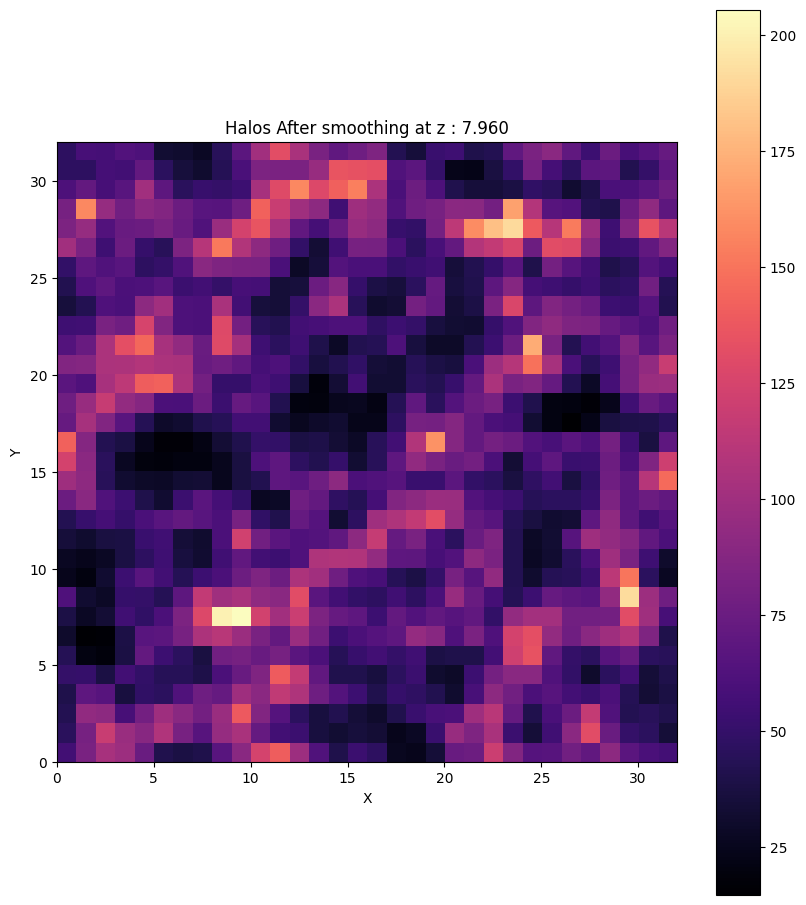

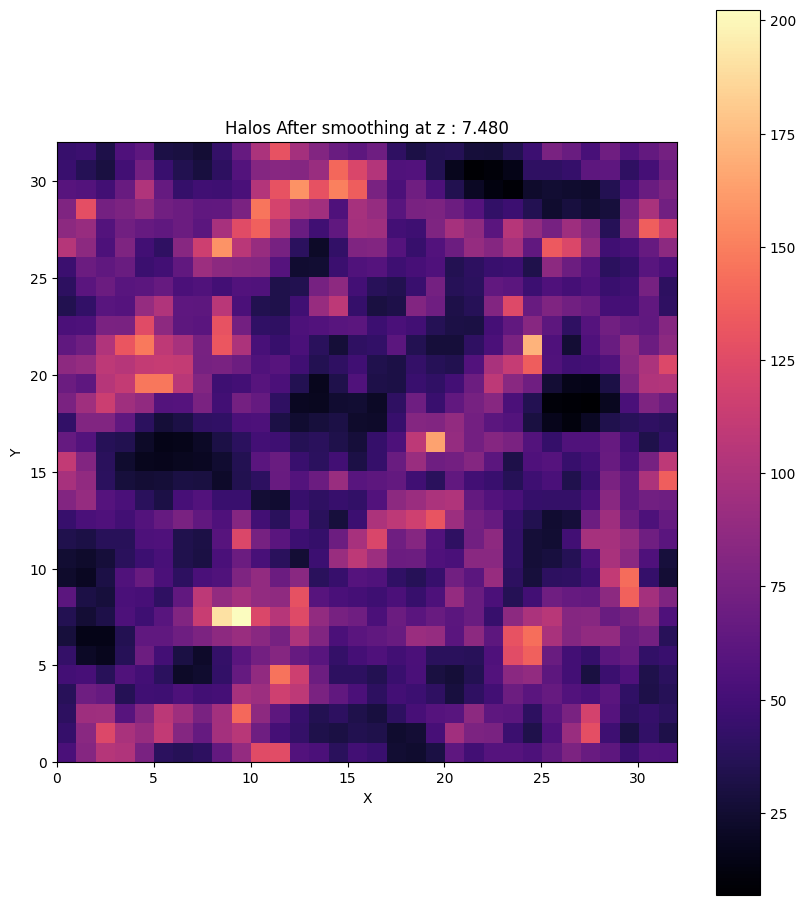

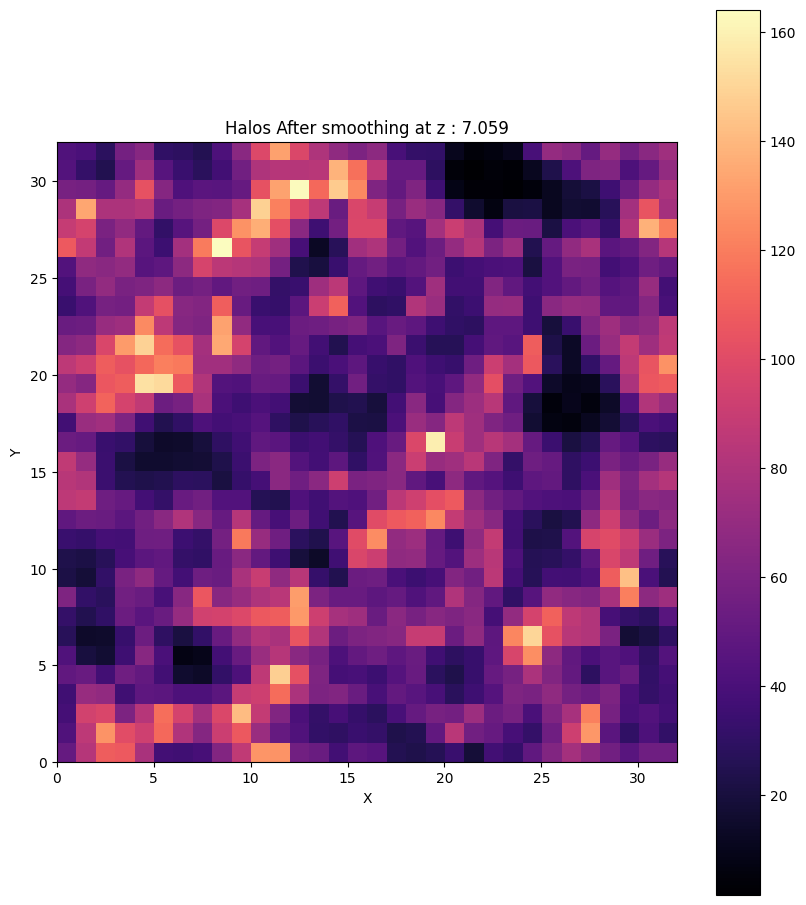

In [28]:
for zs in redshifts:
    plotter(fld_rdr(f'Maps_256_14/HI_maprs_{zs:.3f}'), f"Halos After smoothing at z : {zs:.3f}", 4)

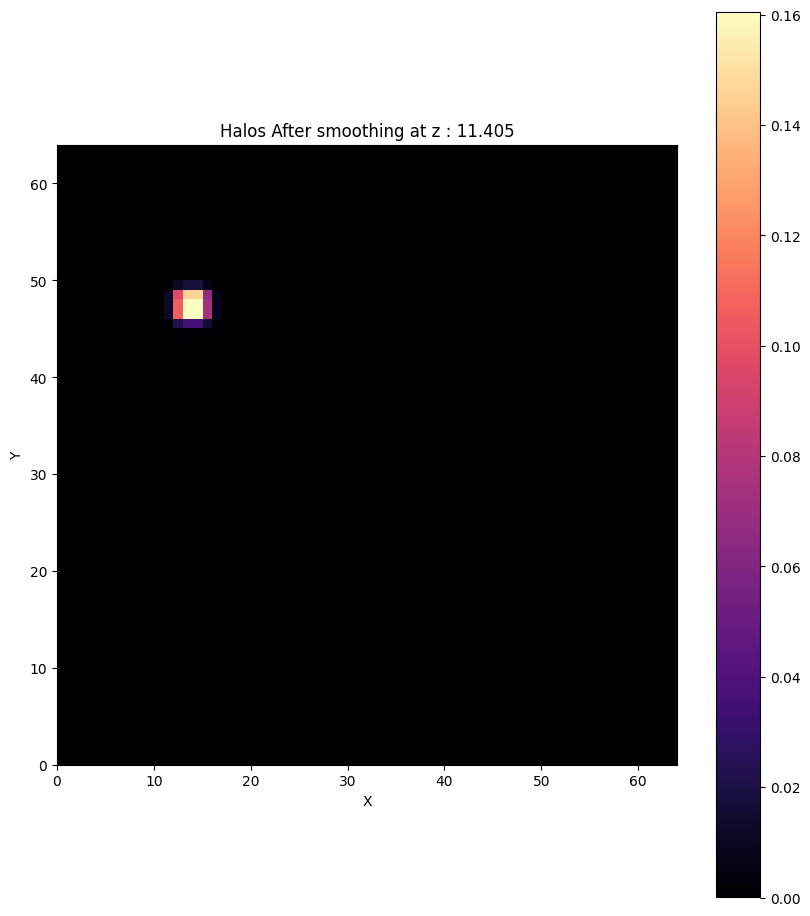

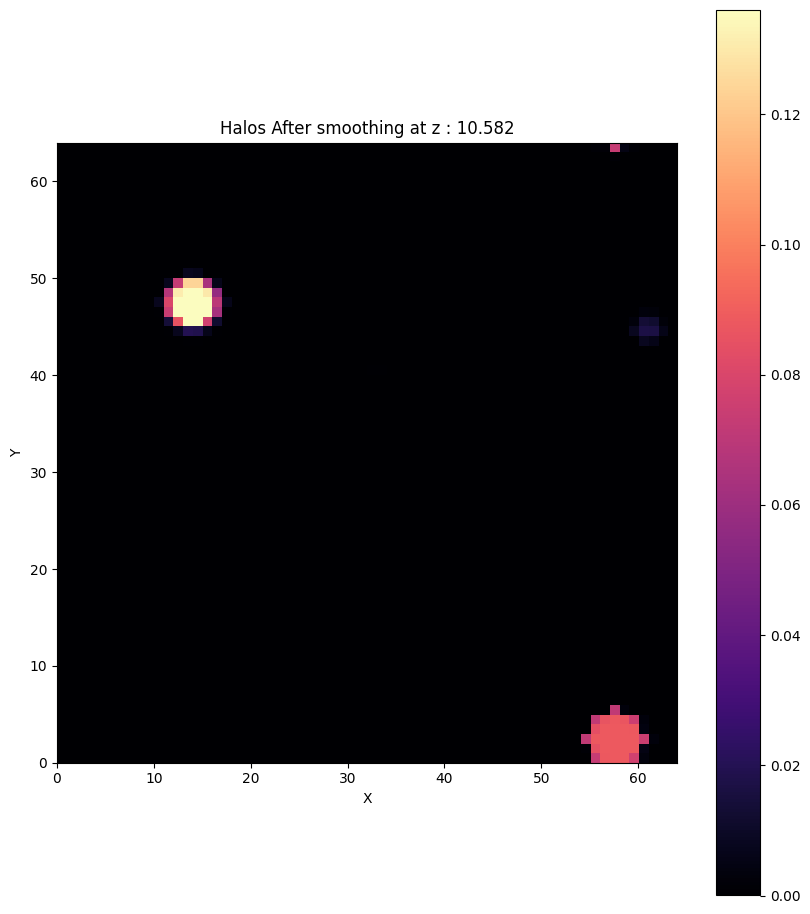

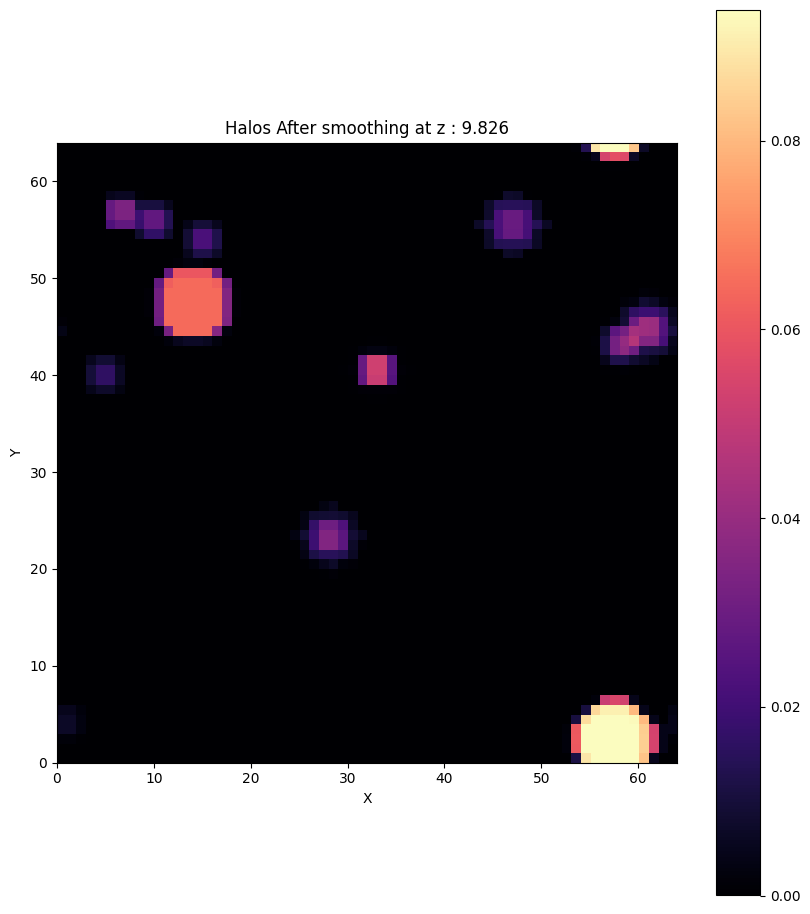

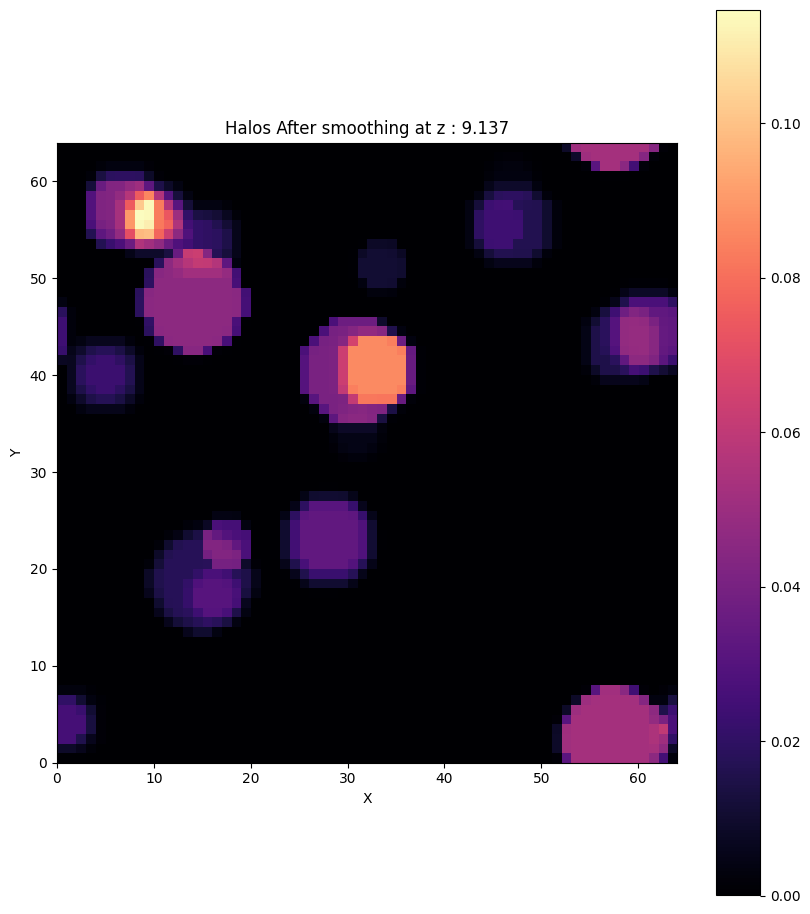

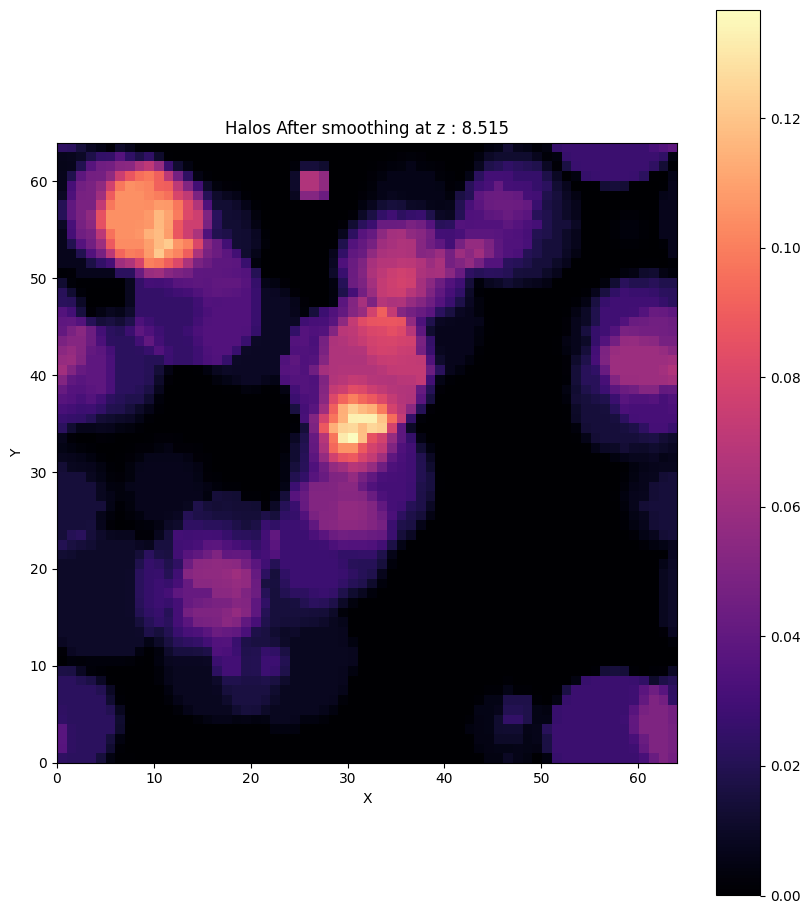

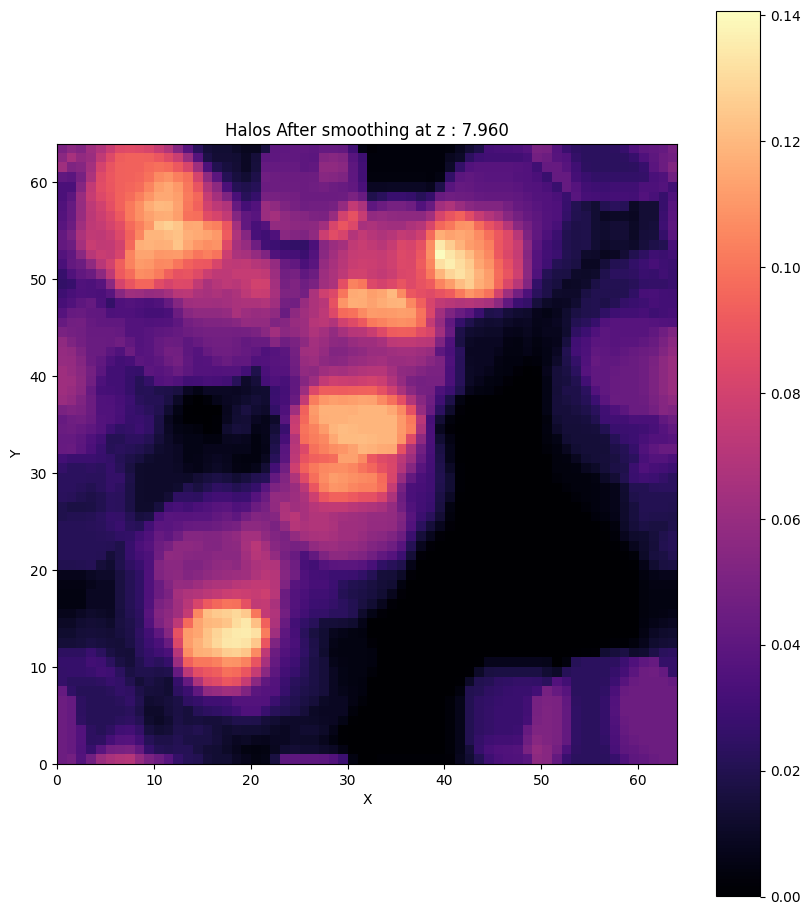

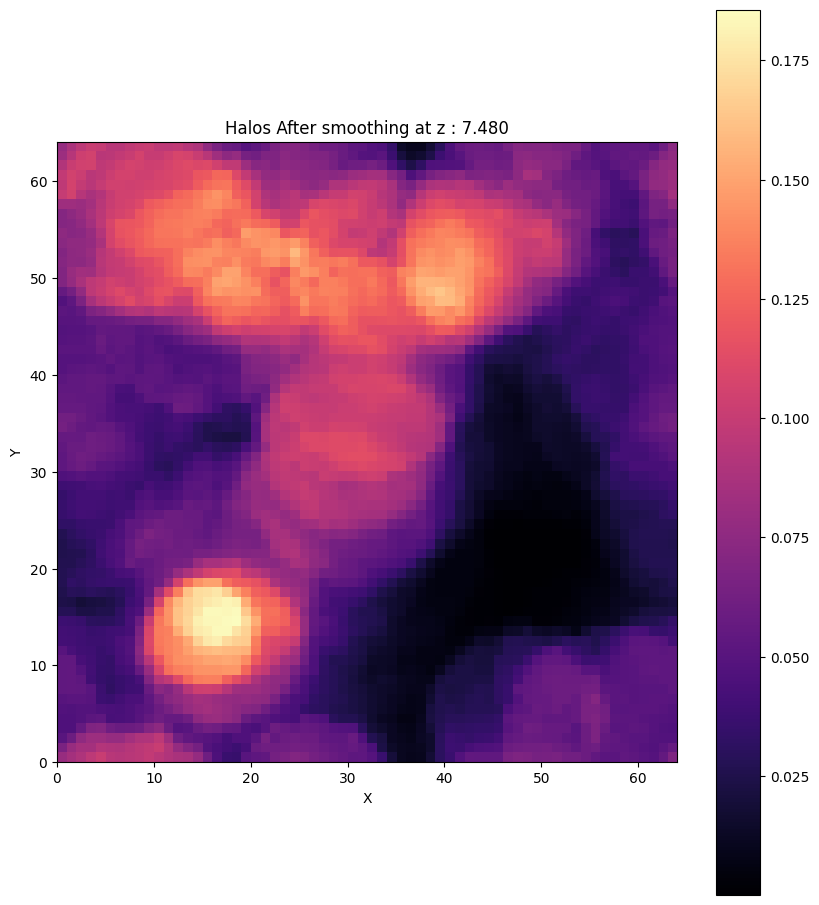

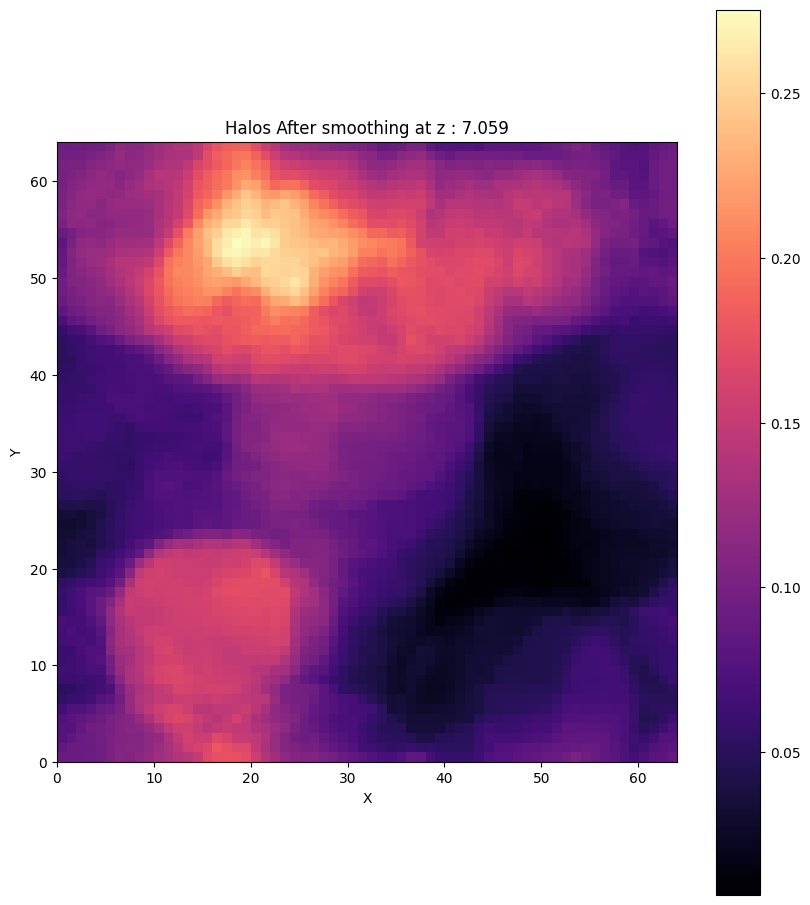

In [33]:
for zs in redshifts:
    arr = convolver(f'Maps_256_14/Halo_map_{zs:.3f}',64, mfp(zs, H(zs, 70.1, 0.3183, 0.6817), 35.84, 64))
    plotter(arr, f"Halos After smoothing at z : {zs:.3f}")

### Due to reduction in the dimension it is difficult to do direct comparison between the obtained ionized fields and the smoothed halo catalogue